# Проект: Линейные модели в машинном обучении

# Модель машинного обучения для владельца молочного хозяйства «Вольный луг».

Фермер хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому нам необходимо разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.


**Цель исследования:**
1. Выполнить предобработку,исследовательский и корреляционний анализ данных.
2. Создать модель, которая будет прогнозировать возможный удой коровы (целевой признак `Удой`).
3. Создать модель, которая будет рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).


**Ход исследования**

Данные получим из файлов `/datasets/ferma_main.csv`,`/datasets/ferma_dad.csv`,`/datasets/cow_buy.csv` , просмотрим общую информацию о датасете, оценим качество данных.

Далее приступим к предобработке данных: проверим и исправим ошибки, которые не приведут к искажению конечного результата, оценим их влияние на исследование. 

Затем настанет очередь исследовательского и корреляционного анализа данных.

Завершающим этапом исследования будет создание прогнозных моделей: линейной регрессии и логистической регрессии.

Таким образом, иследование будет состоять из следующих этапов:

- [Обзор данных](#info)

- [Предобработка данных](#preprocessing)

- [Исследовательский анализ данных](#EDA)

- [Корреляционный анализ](#corr)

- [Обучение модели линейной регрессии¶](#linear)

- [Обучение модели логистической регрессии¶](#logistic)

- [Итоговые выводы](#final)

## Описание данных

Файл **`ferma_main.csv`** содержит данные о стаде фермера на текущий момент. 

| | |
| ------ | ------ | 
| **id** | уникальный идентификатор коровы | 
| **Удой, кг** | масса молока, которую корова даёт в год (в килограммах)|
| **ЭКЕ (Энергетическая кормовая единица)** | показатель питательности корма коровы |
| **Сырой протеин, г** | содержание сырого протеина в корме (в граммах) |
| **СПО (Сахаро-протеиновое соотношение)** | отношение сахара к протеину в корме коровы|
|**Порода**|порода коровы|
|**Тип пастбища**|ландшафт лугов, на которых паслась корова|
|**порода папы_быка**|порода папы коровы|
|**Жирность,%**|содержание жиров в молоке (в процентах)|
|**Белок,%**|содержание белков в молоке (в процентах)|
|**Вкус молока**|оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)|
|**Возраст**|возраст коровы, бинарный признак (менее_2_лет, более_2_лет)|

__________________________________________

Признаки в датасете `ferma_main.csv` можно разделить на группы.

| | |
| ------ | ------ | 
| **Характеристики коровы:** | id, Порода, порода папы_быка, Возраст | 
|**Характеристики корма:**|ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)|
|**Характеристика пастбища:**|Тип пастбища|
|**Характеристики молока:**|Удой, кг, Жирность,%, Белок,%, Вкус молока|

__________________________________________

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:

| | |
| ------ | ------ | 
| **id** | уникальный идентификатор коровы | 
|**Имя Папы**|имя папы коровы|

________________________________

Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

| | |
| ------ | ------ | 
| **Порода** |  порода коровы| 
|**Тип пастбищ**|ландшафт лугов, на которых паслась корова|
|**порода папы_быка**|порода папы коровы|
|**Имя_папы**|имя папы коровы|
|**Текущая_жирность,%**|содержание жиров в молоке (в процентах)|
|**Текущий_уровень_белок,%**|содержание белков в молоке (в процентах)|
|**Возраст**|возраст коровы, бинарный признак (менее_2_лет, более_2_лет)|


### **Общая информация**
<a id='info'></a>

In [1]:
# Импротируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Зафиксируем случайность
RANDOM_STATE = 42

!pip install phik -q
import phik

In [2]:
ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')

In [3]:
#создаем функцию для получения общей информации
def general_info(df):
    return display(df.shape, df.head(), df.info())

In [4]:
# Посмотрим на первые 5 строк каждого датасета и общую информацию
general_info(ferma_main)
general_info(ferma_dad)
general_info(cow_buy);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

(634, 12)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


(629, 2)

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


(20, 7)

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

None

**`ferma_main.csv`** содержит **634 строк и 12 столбцов**.

**`ferma_dad.csv`** содержит **629 строк и 2 столбца**.

**`cow_buy.csv`** содержит **20 строк и 7 столбцов**.

В данных присутствуют неправильные названия столбцов, пропуски отсутствуют, типы данных корректны.

### **Предобработка данных**
<a id='preprocessing'></a>

#### **Переименование столбцов**

In [5]:
# Выводим названия столбцов
display(ferma_main.columns, ferma_dad.columns, cow_buy.columns)

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

Index(['id', 'Имя Папы'], dtype='object')

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [6]:
# Напишем функцию, которая приводит названия к змеиному регистру
def snake_reg(df):
    df.columns = (df.columns
    .str.lower()
    .str.replace(',%','')
    .str.replace(', г','')
    .str.replace(', кг','')
    .str.replace(' ','_')
)
    return df.columns


In [7]:
# Применение функции и проверка результатов - перечень названий столбцов
display(snake_reg(ferma_main),snake_reg(ferma_dad),snake_reg(cow_buy))

Index(['id', 'удой', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин',
       'спо_(сахаро-протеиновое_соотношение)', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')

In [8]:
# Переименуем длинные названия
ferma_main = ferma_main.rename(columns={'эке_(энергетическая_кормовая_единица)':'эке',
                                        'спо_(сахаро-протеиновое_соотношение)':'спо'})
cow_buy = cow_buy.rename(columns={'текущая_жирность':'жирность', 'текущий_уровень_белок':'белок'})

In [9]:
# Проверка результатов - перечень названий столбцов
print(ferma_main.columns, cow_buy.columns)

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object') Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')


**Вывод:** Таким образом, мы переименовали столбцы датафреймов, и теперь все названия в змеином регистре.

#### **Пропущенные значения**

Определим, в каких столбцах есть пропуски.

In [10]:
# Создадим функцию для нахождения пропусков в столбцах
def na_values(df):
    return display(pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm'))

In [11]:
# Посмотрим на пропущенные значения в столбцах
na_values(ferma_main)
na_values(ferma_dad)
na_values(cow_buy);

**Вывод:** таким образом, пропущенные значения не обнаружены.

#### **Явные и неявные дубликаты**

Проверим количество **неявных** дубликатов в данных.

In [12]:
# Выведем уникальные значения столбцов 'тип_пастбища', 'порода_папы_быка'
display(ferma_main['тип_пастбища'].unique(), ferma_main['порода_папы_быка'].unique())

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [13]:
# Выведем уникальные значения столбцов 'тип_пастбища', 'порода_папы_быка'
display(cow_buy['тип_пастбища'].unique(), cow_buy['порода_папы_быка'].unique())

array(['холмистое', 'равнинное'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

Приведем неявные дубликаты к общему названию

In [14]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace(['Равнинное', 'Равнинные','Холмистое'],
                                                                ['равнинное','равнинное','холмистое'])
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл','Айдиал')

In [15]:
# Проверка
display(ferma_main['тип_пастбища'].unique(), ferma_main['порода_папы_быка'].unique())

array(['равнинное', 'холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

Проверим количество **явных** дубликатов в данных.

In [16]:
display(ferma_main.duplicated().sum(),ferma_dad.duplicated().sum())

5

0

In [17]:
# Устраним явные дубликаты
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

In [18]:
# Проверка
display(ferma_main.duplicated().sum(),ferma_dad.duplicated().sum(), cow_buy.duplicated().sum())

0

0

4

In [19]:
ferma_main[ferma_main.duplicated(subset=ferma_main.select_dtypes(include=['object']).columns)]

id  удой   эке  сырой_протеин    спо           порода тип_пастбища  \
4      5  5302  12.8           1675  0.885   Вис Бик Айдиал    равнинное   
7      8  6179  14.7           1806  0.930   Вис Бик Айдиал    равнинное   
15    16  6518  15.6           1747  0.930   Вис Бик Айдиал    равнинное   
17    18  5777  12.4           1873  0.895   Вис Бик Айдиал    холмистое   
18    19  6461  15.7           2159  0.930  РефлешнСоверинг    холмистое   
..   ...   ...   ...            ...    ...              ...          ...   
624  625  6812  15.4           1964  0.940  РефлешнСоверинг    равнинное   
625  626  5513  12.9           1700  0.880  РефлешнСоверинг    равнинное   
626  627  5970  14.4           1837  0.880  РефлешнСоверинг    холмистое   
627  628  5746  13.8           1994  0.890  РефлешнСоверинг    равнинное   
628  629  6503  16.2           2283  0.940   Вис Бик Айдиал    холмистое   

    порода_папы_быка  жирность  белок вкус_молока      возраст  
4            Соверин      3.73  3.073      вкусно  менее_2_лет  
7             Айдиал      3.55  3.076      вкусно  более_2_лет  
15            Айдиал      3.73  3.076      вкусно  более_2_лет  
17            Айдиал      3.03  3.080      вкусно  более_2_лет  
18           Соверин      3.72  3.073   не вкусно  более_2_лет  
..               ...       ...    ...         ...          ...  
624           Айдиал      3.74  3.075   не вкусно  более_2_лет  
625          Соверин      3.64  3.073      вкусно  менее_2_лет  
626          Соверин      3.64  3.075   не вкусно  более_2_лет  
627          Соверин      3.64  3.077      вкусно  более_2_лет  
628          Соверин      3.71  3.076      вкусно  более_2_лет  

[598 rows x 12 columns]

**Вывод:** таким образом, явные и неявные дубликаты были обнаружены и устранены.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

В этом разделе всё ОК: необходимые после загрузки данных действия (1. загрузка данных, 2. требования PEP8, 3. дубликаты, 4. анализ уникальных значений в признаках 5. пропуски) выполнены. 

</div>

### **Исследовательский анализ данных**
<a id='EDA'></a>

#### **Статистический анализ количественных признаков**

In [20]:
# Выведем статистики количественных признаков
display(ferma_main.describe(), cow_buy.describe())

id          удой         эке  сырой_протеин         спо  \
count  629.00000    629.000000  629.000000     629.000000  629.000000   
mean   315.00000   6188.750397   14.543879    1923.364070    0.913116   
std    181.72094   1644.795489    1.306408     182.956251    0.032203   
min      1.00000   5204.000000   10.900000    1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000    1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000    1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000    2062.000000    0.940000   
max    629.00000  45616.000000   16.800000    2349.000000    0.960000   

         жирность       белок  
count  629.000000  629.000000  
mean     3.603657    3.075671  
std      0.168656    0.002549  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000

жирность      белок
count  20.000000  20.000000
mean    3.577500   3.069500
std     0.126818   0.010339
min     3.340000   3.046000
25%     3.510000   3.064000
50%     3.590000   3.074000
75%     3.650000   3.076000
max     3.770000   3.081000

В признаке 'удой' присутствует аномальное значение максимума, в связи с чем и стандартное отклонение высоко. В остальных признаках минимальные и максимальные значения соответствуют реальности, среднее несильно отличается от медианы. 

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>



Молодец! Не часто вижу чтобы результат describe() вообще, в принципе, комментировали. Обычно почему-то просто "выводят эту табличку" и ни словом в выводах её не упоминают.

describe() играет важную роль в понимание распределения статистик признаков в данных. Отсюда можно увидеть аномалии, выбросы. Просто "посмотреть" на эти таблички недостаточно, обязательно нужен вывод по анализу результата describe().

---
describe() в pandas - это мощный метод, который предоставляет статистическое описание данных. Вот несколько причин, почему describe() важен:

1. Общее понимание данных: describe() предоставляет общий обзор статистических характеристик, таких как среднее значение, стандартное отклонение, минимум, максимум и квартили. Это позволяет быстро понять основные характеристики данных.
    
2. Выявление выбросов: Анализ статистических показателей может помочь выявить аномалии или выбросы в данных. Например, если среднее значение сильно отличается от медианы, это может указывать на наличие выбросов.

3. Понимание распределения данных: describe() также предоставляет информацию о распределении данных через квартили, что может быть полезным для понимания формы распределения.

4. Быстрый анализ пропущенных значений: Метод также выводит количество непустых значений для каждого столбца, что может помочь в определении пропущенных данных.    
</div>

In [21]:
# Посмотрим на аномальное значение признака 'удой'
ferma_main[ferma_main['удой']>8000]

id   удой   эке  сырой_протеин   спо          порода тип_пастбища  \
16  17  45616  11.5           1675  0.93  Вис Бик Айдиал    холмистое   

   порода_папы_быка  жирность  белок вкус_молока      возраст  
16           Айдиал      3.22  3.076      вкусно  более_2_лет

In [22]:
# Удалим аномальное значение
ferma_main = ferma_main.drop(ferma_main[ferma_main['удой'] > 8000].index)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично, выброс по удою (45 тонн молока в год - это фантастика!) обнаружен и удален в таблице с текущим стадом фермера.
    
p.s. обрати внимание на строку с id == 17 в датафрейме с именами пап-быков. Удалять её явно может быть и не требуется (при корректном объединении датафреймов (ниже) этот момент будет обработан автоматически), но отметить этот момент я всё-таки хочу (на всякий случай).


</div>

Построим графики для количественных признаков: гистограмму частотности распределения и ящик с усами.

In [23]:
# Определим функцию для построения гистрограммы
def hist_plot(df):
    for col in df.select_dtypes(include=['int','float']).columns:
        plt.figure(figsize=(16,7))
        df[col].hist(bins=50)
        plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
        plt.minorticks_on()
        plt.tick_params(which='minor')
        plt.xticks(rotation = 25)
        plt.title(f'Признак {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')
        plt.show()

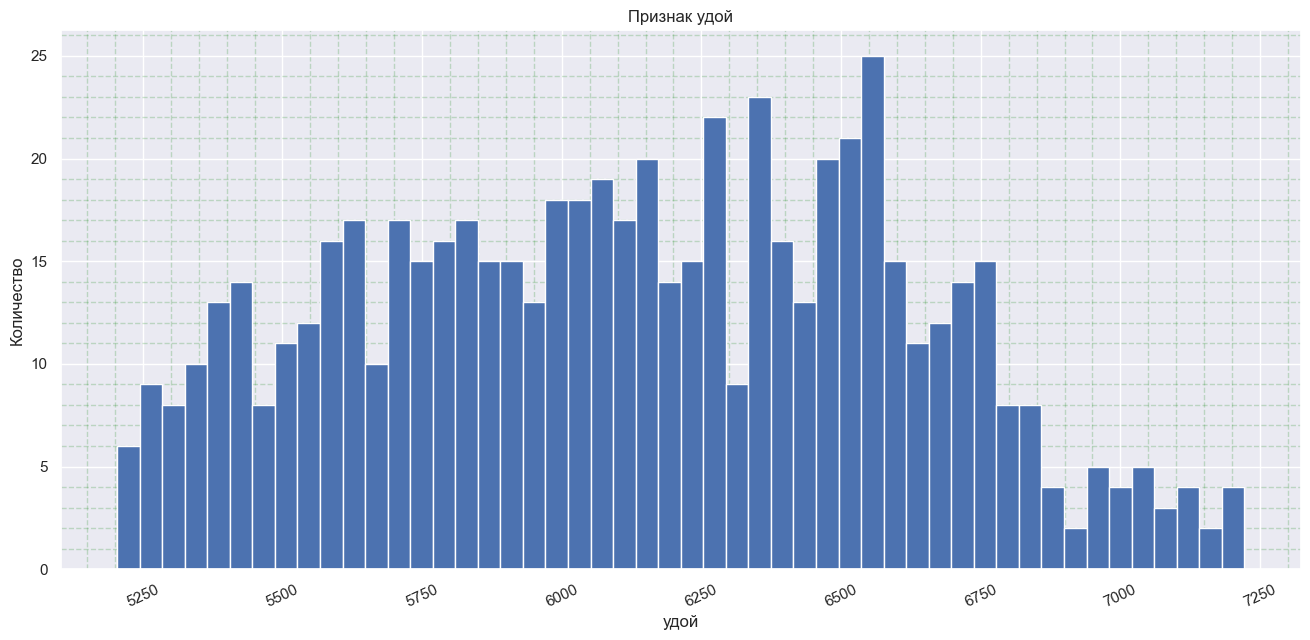

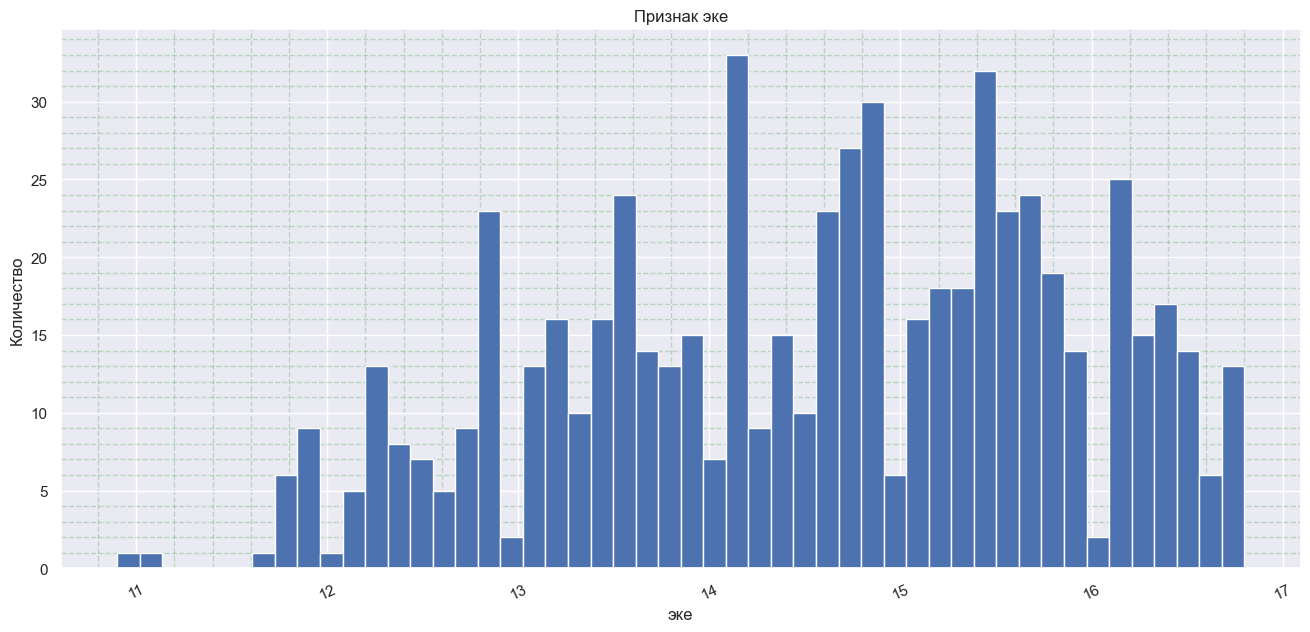

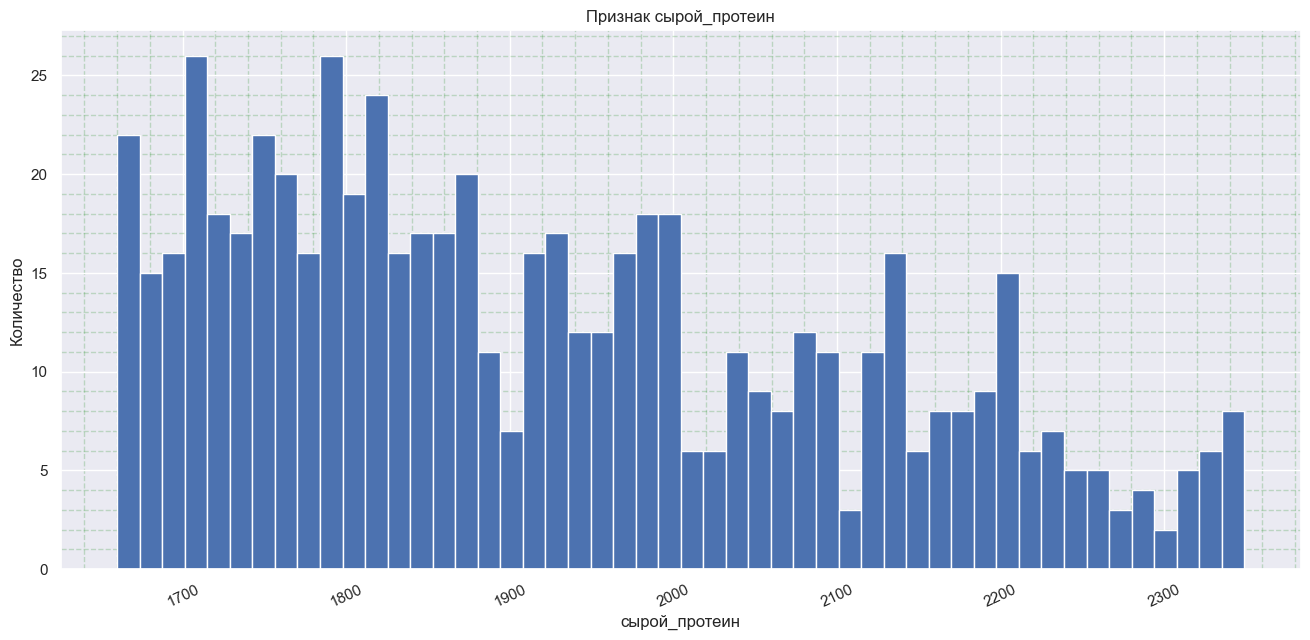

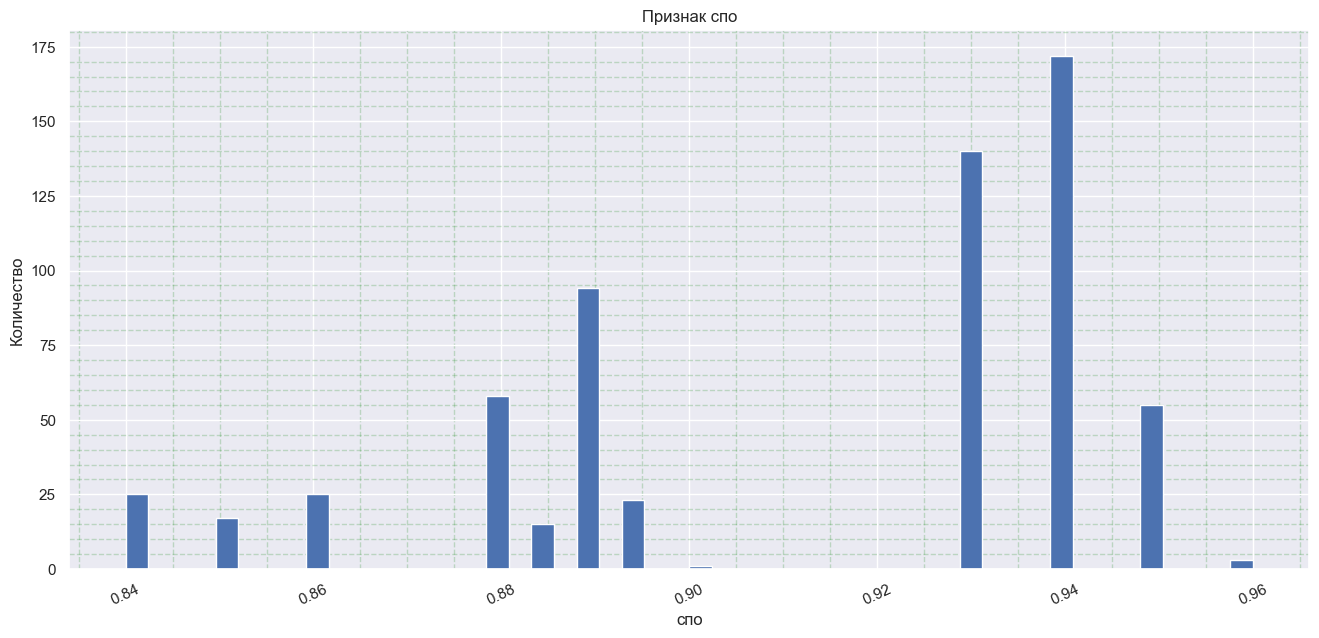

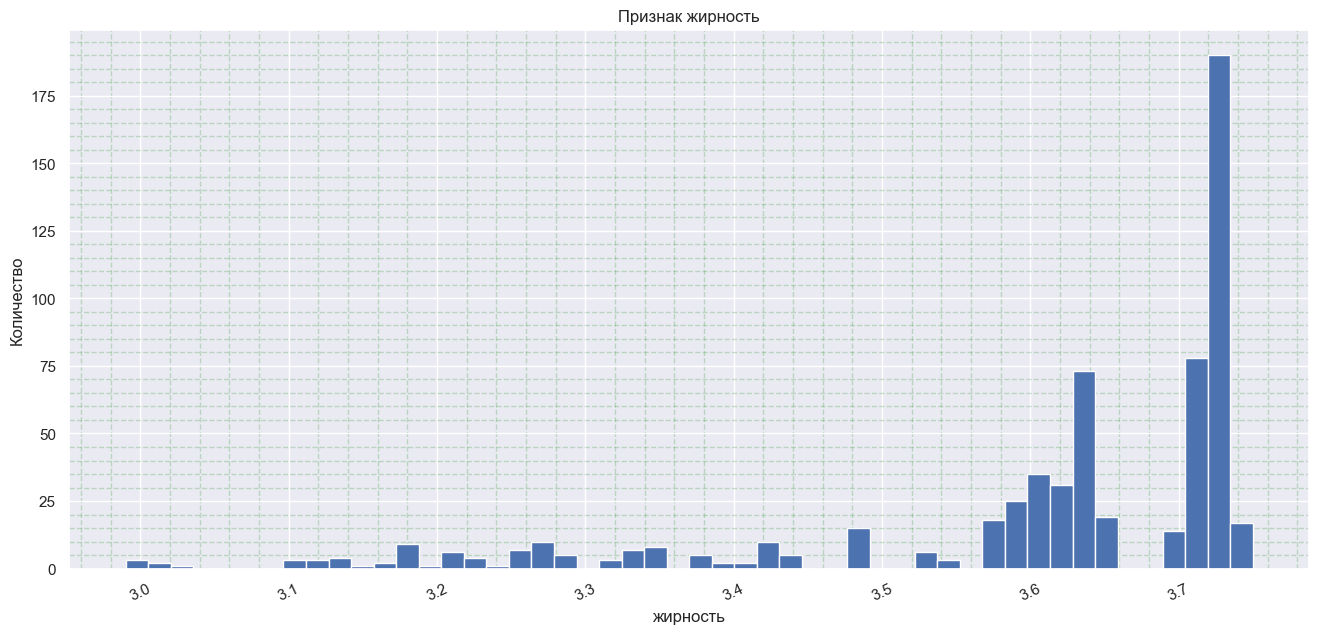

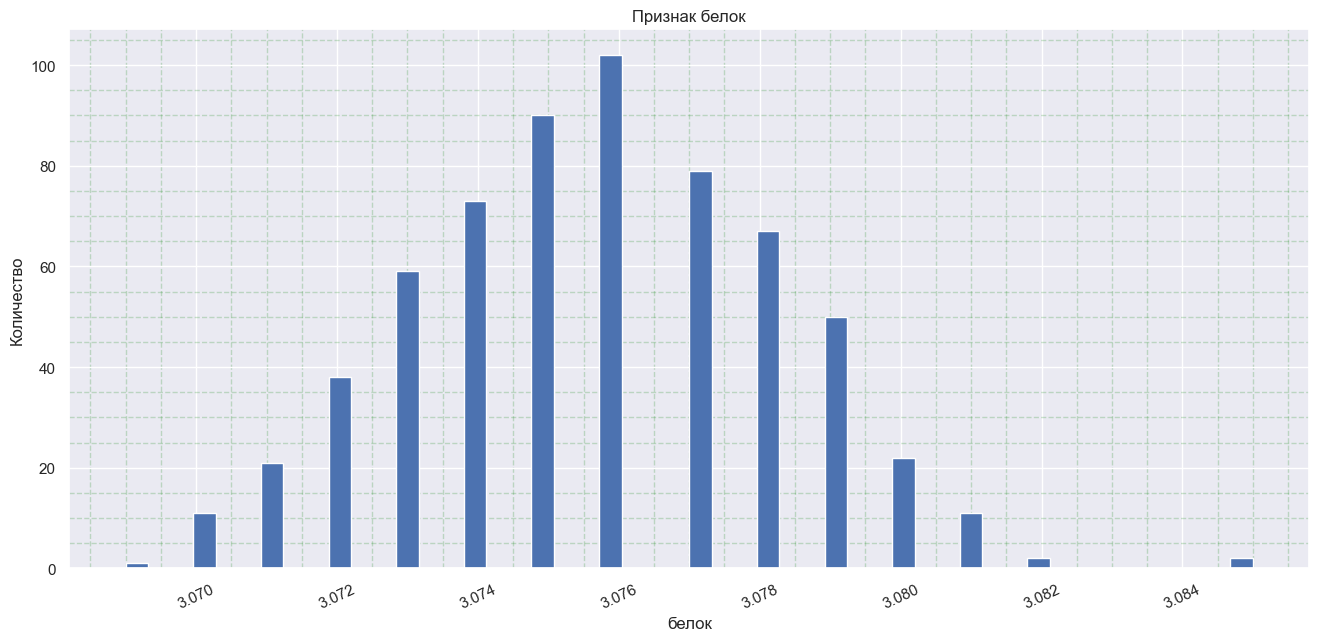

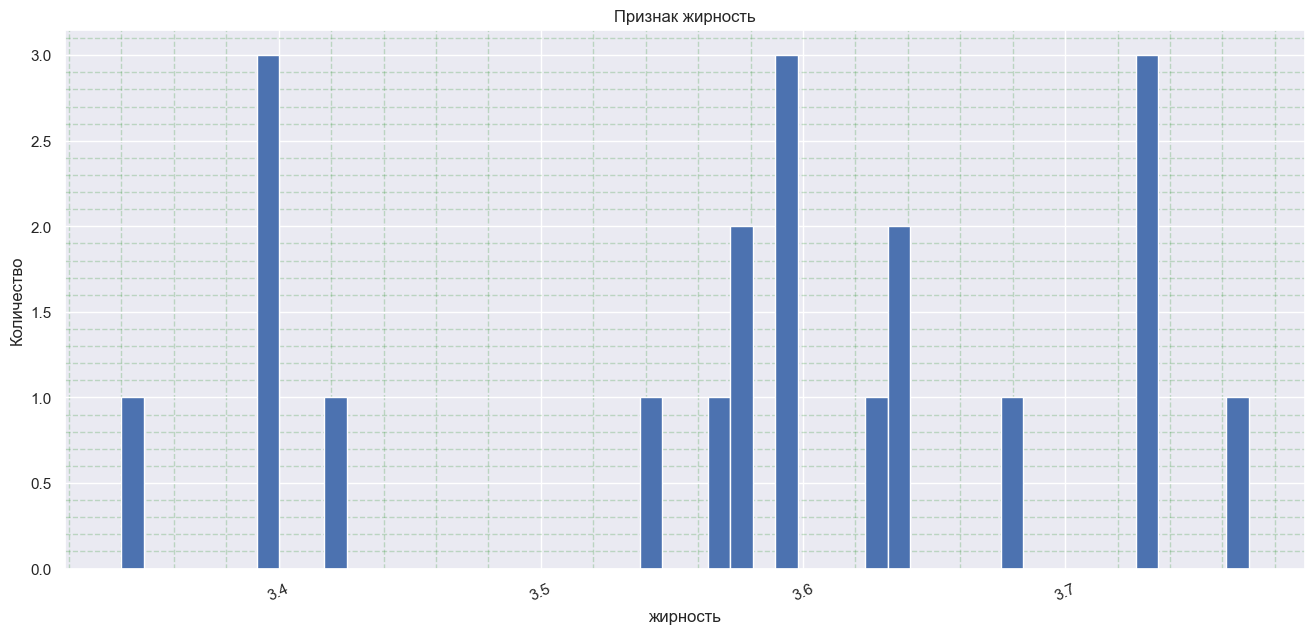

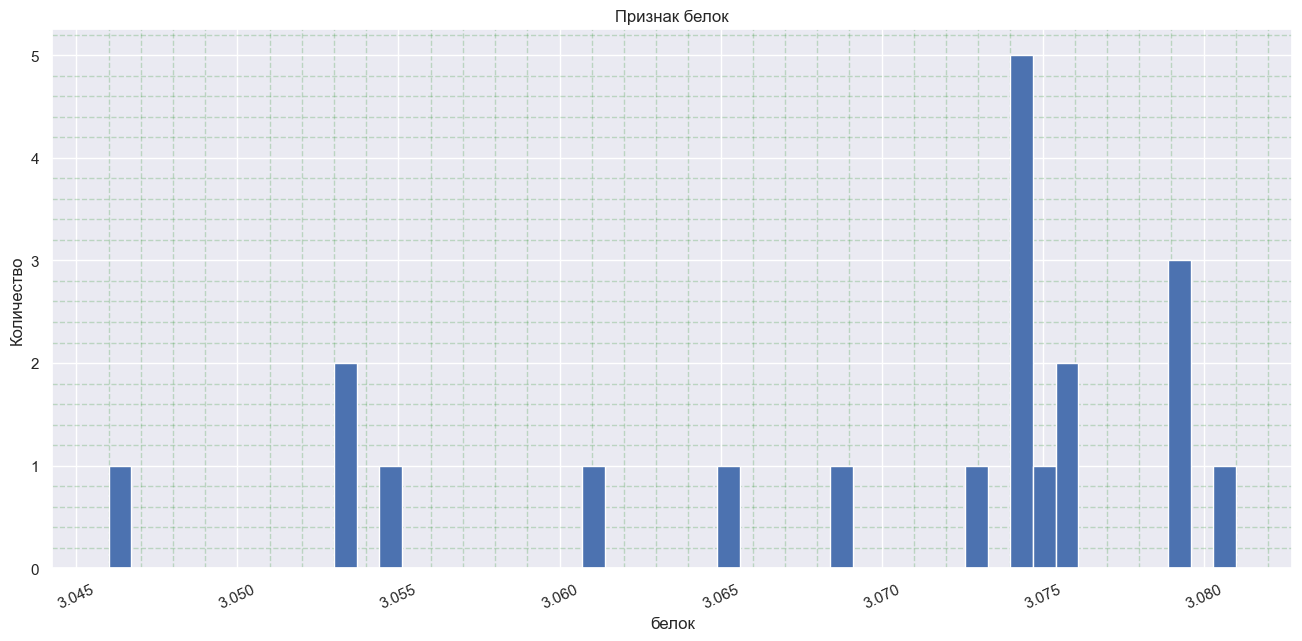

In [24]:
# Строим гистограмму
hist_plot(ferma_main.drop('id', axis=1))
hist_plot(cow_buy)

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

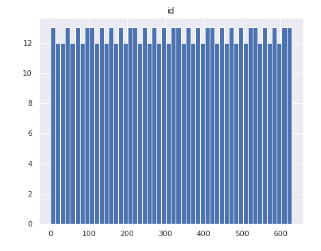

Ну и о чем нам говорит этот график? Он полезен нам в EDA? 
    
id из графического анализа нужно удалить (это просто инкремент, порядковые номера коров).
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>



(на примере моего скрина ниже) Вот здесь уже видно, что этот  признак - кандидат на перевод в категориальную шкалу (из 2х или из 3х элементов - что надо проверять качеством модели итоговой).


</div>

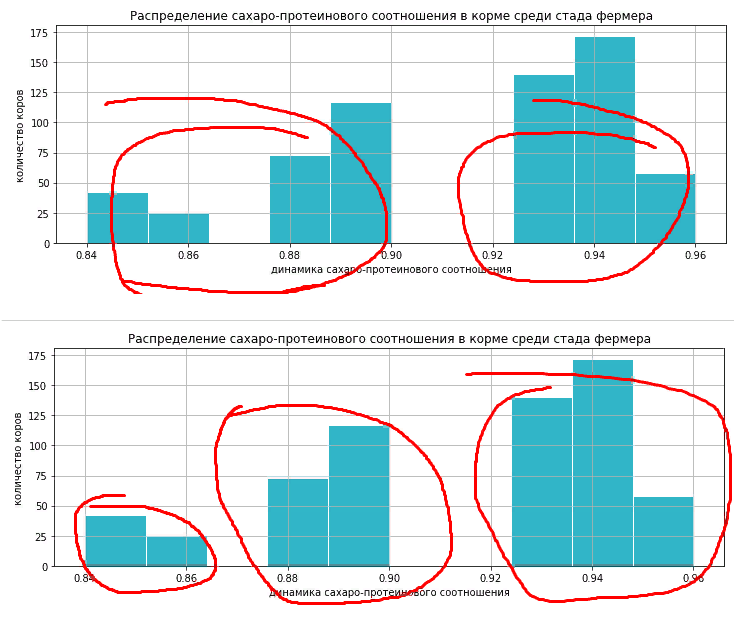

<div class="alert alert-warning">
<b>Комментарий 👉</b>



(на примере моего скрина ниже) Признак "жирность" тоже кажется потенциально той фичей, которую имело бы смысл перевести в категориальную шкалу: "низкая"-"средняя"-"высокая" (хотя в отличии от СПО это в ТЗ не требуется ... но попытаться сделать можно. После этого посмотреть как это скажется на качестве модели). На примере моего(!) скрина: возможные отсечки по категориям ...


</div>

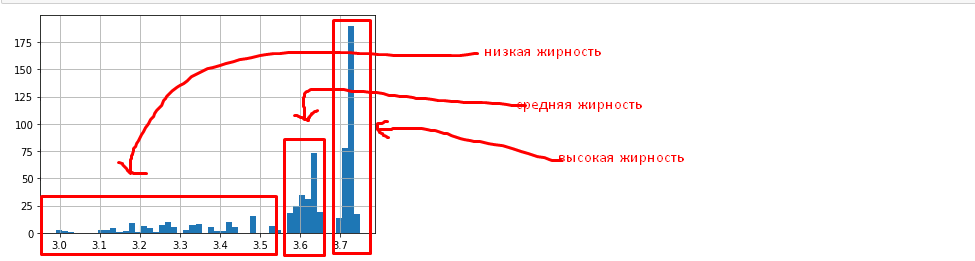

Можно сказать, что признаки в датафрейме `ferma_main` не имеют сильных выбросов и аномалий, однако в признаках "спо","жирность", "текущий_уровень_белок", "текущая_жирность" присутсвуют провалы в распределении, что может быть связано с биологическим или технологическим фактором.

В датафрейме `cow_buy` гистограммы имеют данный внешний вид в связи с малым размером выборки.

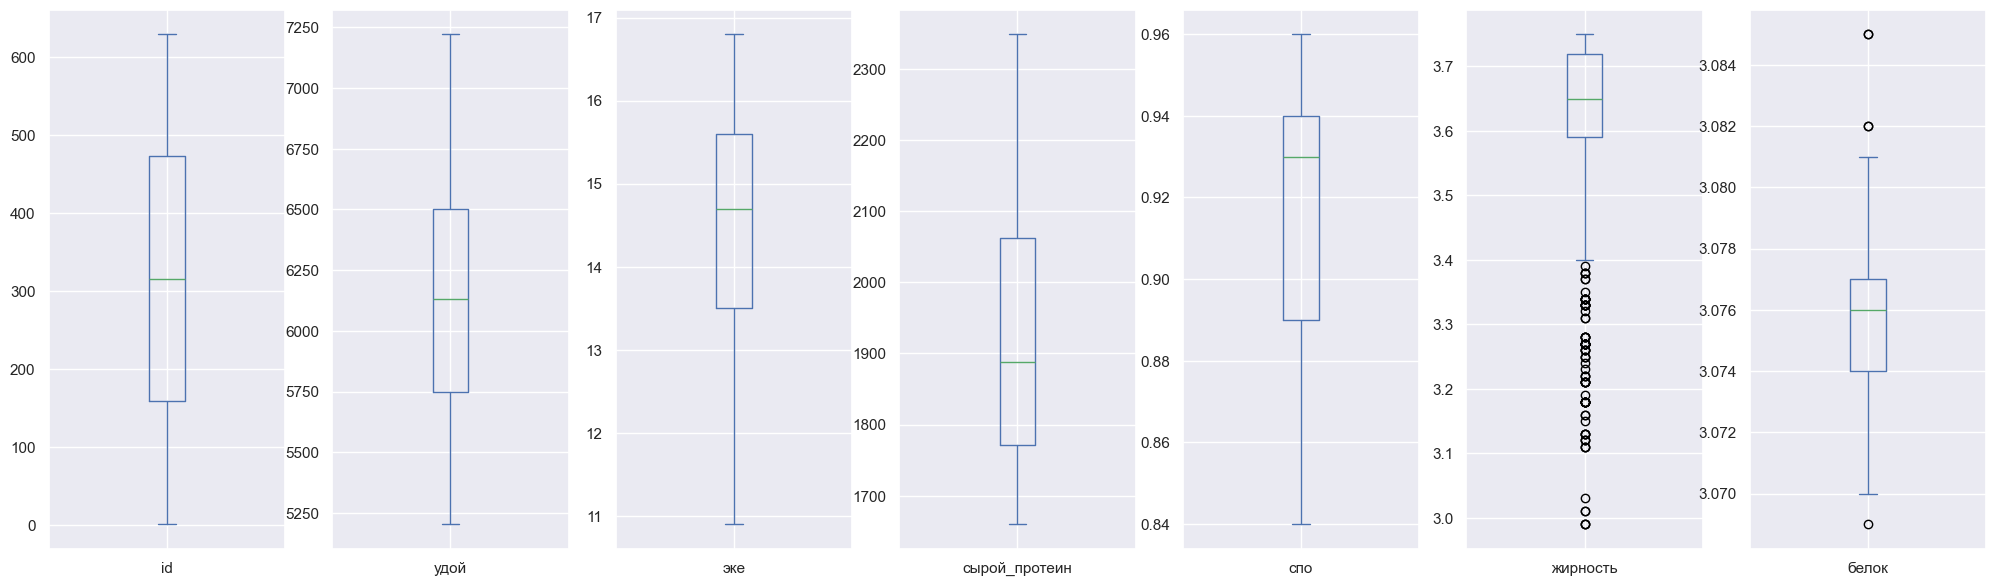

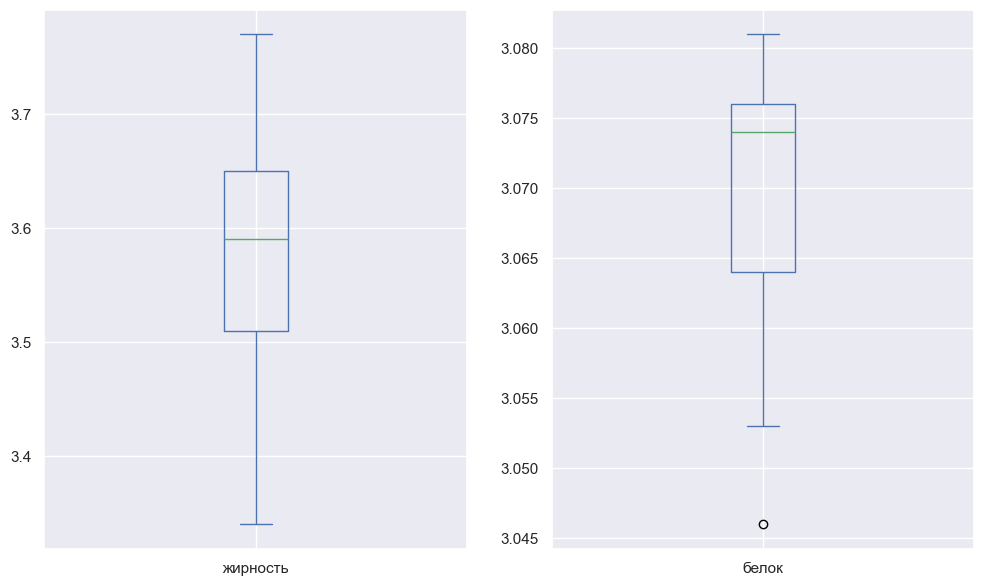

In [25]:
ferma_main.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(25, 7)
)
cow_buy.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(12, 7)
);

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично!  Боксплот рядом с гистограммой - это отлично! Гистограмма будет показывать нам распределение количественного признака, а боксплот даст информацию о **возможных выбросах** (пишу **возможных**, потому что нужно анализировать бизнесовый смысл значений показанных как выбросы ... просто так удалять то, что показывает боксплот за пределами 1,5 IQR от границ "ящика" - неверно) и основных статистиках (квартилях) признака.
</div>

У признаков "жирность" и "белок" в датафрейме `ferma_main` есть много выбросов снизу и сверху, следует предположить, что это связано с биологической вариативностью, и оставить в исследовании.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>



Молодец, верно! Я бы с этим тоже был бы аккуратней. У нас ведь нет знаний в части бурёнок? )))) Считать значения "выбросами" только потому что их так гистограмма/боксплот отобразил на мой взгляд неверно (в одном из следующих проектов: "Численные методы" (про предсказания стоимости б/у автомобилей) коллеги любят "чистить" данные от б/у машин стоимостью выше 15.000 евро ... на вопрос почему - говорят что боксплот показал. При этом в данных есть премиальные БМВ, Ауди и прочие Лексусы которые явно даже в б/у виде за 15 тысяч евро не купить).

В общем я бы тоже оставил эти "цифры" в наших данных. Не обладая специальными знаниями в части животноводчества удалять какие-то очень специфичные цифры наверное всё-таки не стоит ... опасно.
</div>


**Вывод:** таким образом, мы избавились от аномальных значений и посмотрели на распределение количественных признаков.

#### **Статистический анализ категориальных признаков**

In [26]:
# Создаем функцию, которая строит столбчатую диаграмму для каждого категориального столбца 
def cat_plot(df):
    for col in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(16,7))
        sns.countplot(x=col, data=df, palette='viridis')
        plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
        plt.minorticks_on()
        plt.tick_params(which='minor')
        plt.xticks(rotation = 25)
        plt.title(f'Признак {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')
        plt.show()

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


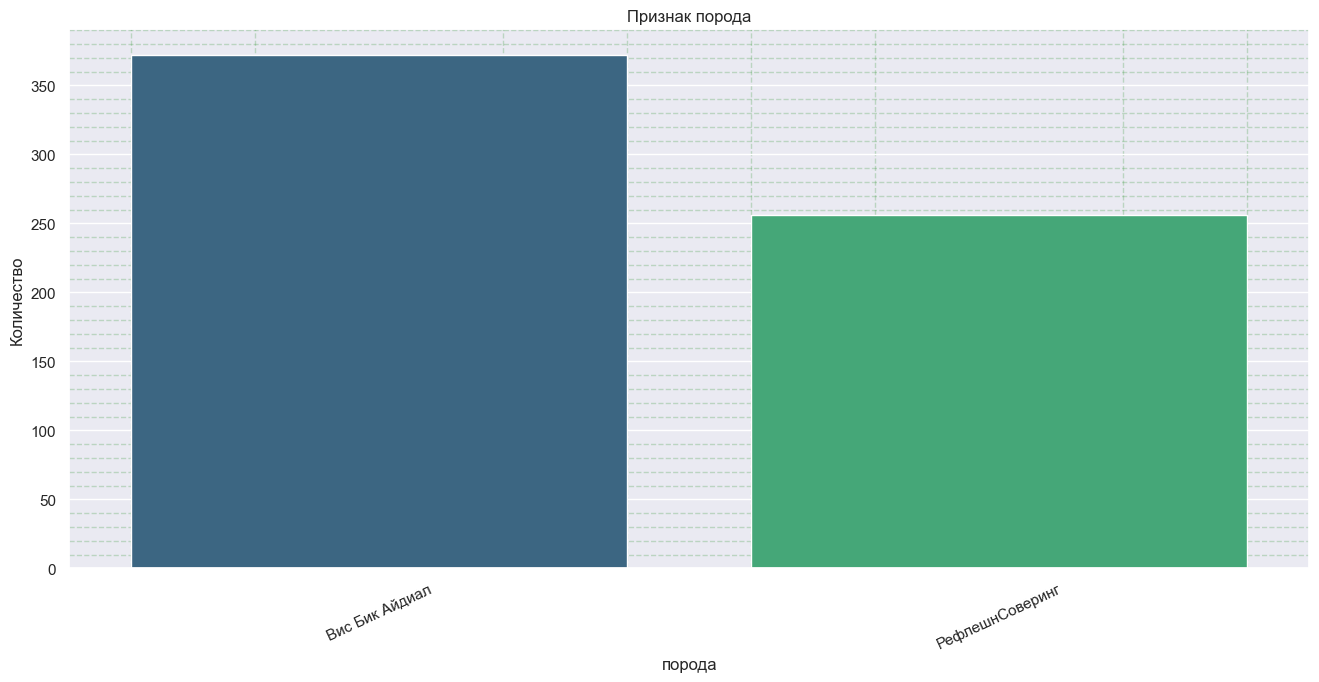

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


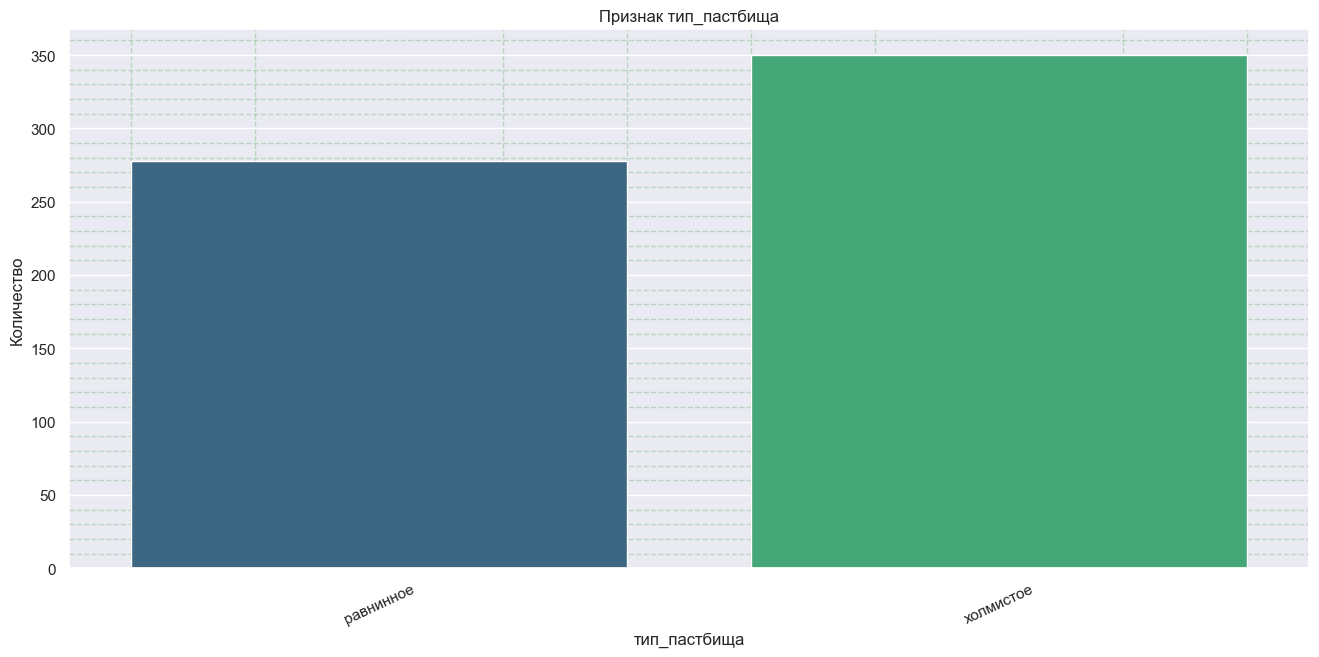

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


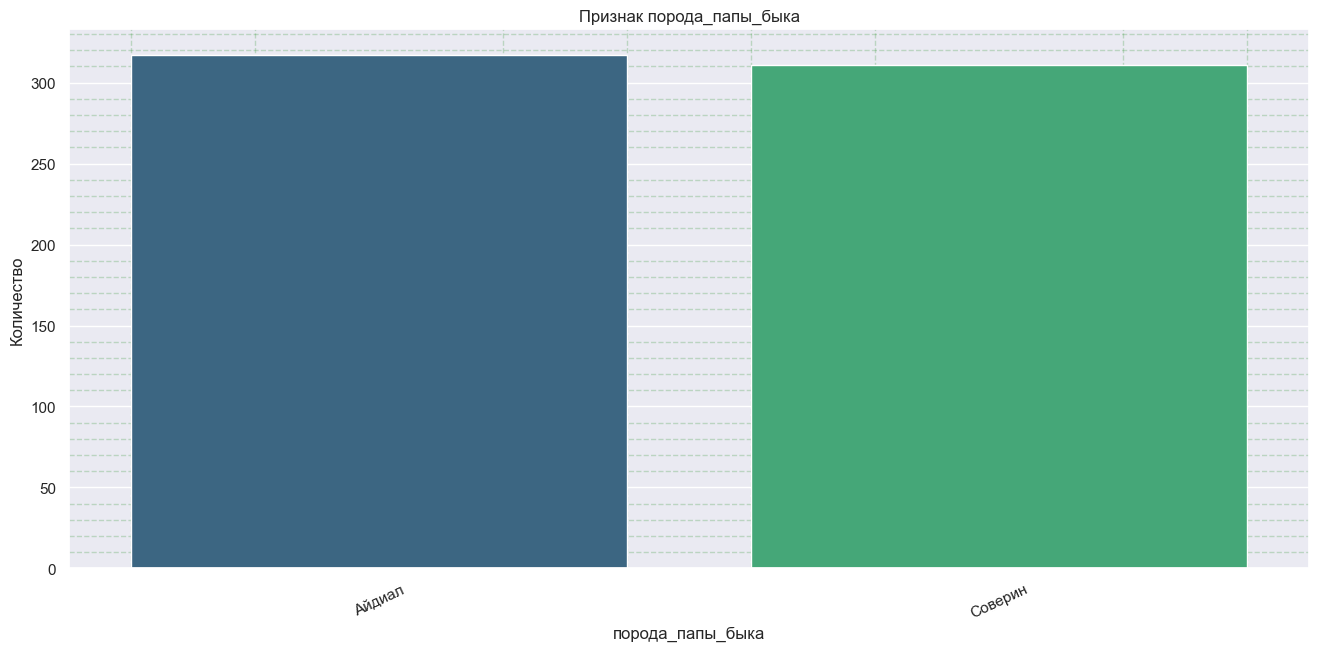

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


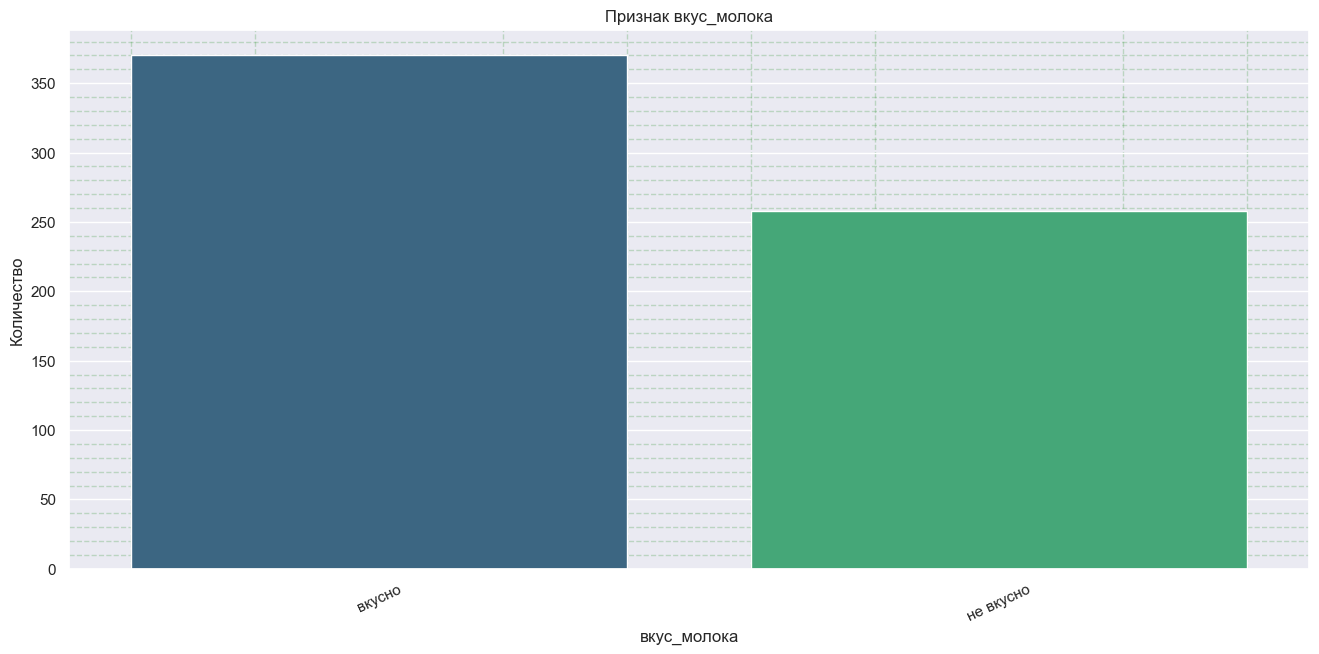

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


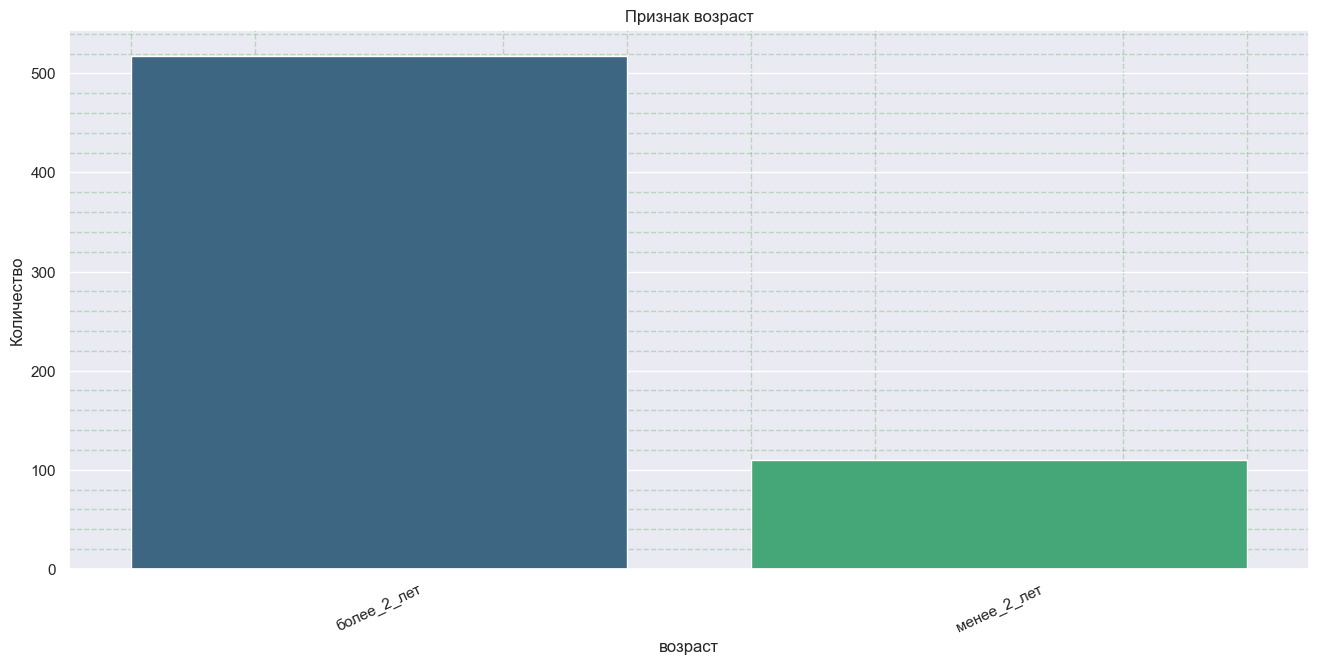

In [27]:
# Строим диаграмму для датафрейма 'ferma_main'
cat_plot(ferma_main)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

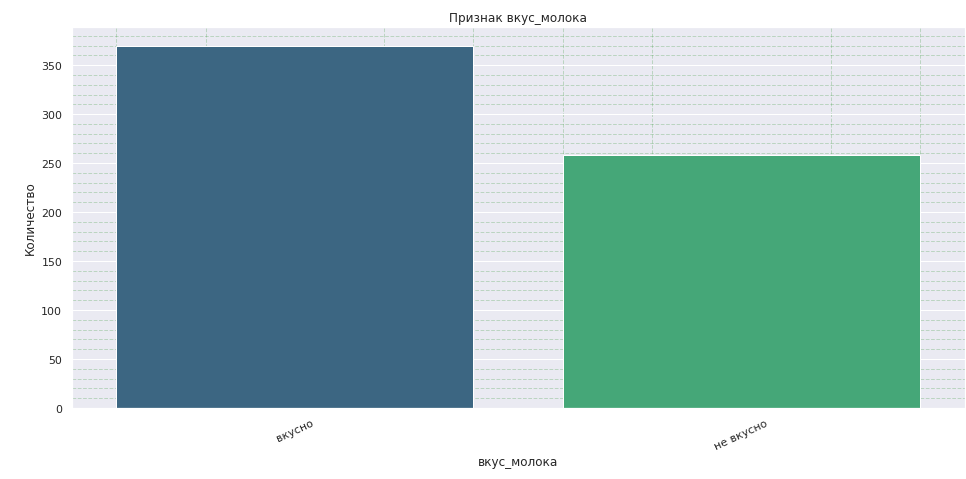

Наблюдаешь ли дисбаланс в целевой переменной (таргете)? **Если наблюдаешь, то как этот факт отражается на выборе метрики для моделей МО?**
</div>

Коров породы Вис Бик Айдиал на 110 голов больше, чем РевлешнСоверинг. 

Холмистых пастбищ на 70 больше, чем равнинных.

Порода папы быка Айдиал на 10 больше, чем Соверин.

Вкусного молока на 110 голов больше, чем невкусного: мы наблюдаем дисбаланс в целевой переменной, значит стандартные метрики, такие как точность, могут вводить в заблуждение и давать неверное представление о реальной производительности модели. Вместо точности будем использовать метрики, которые учитывают распределение классов и позволяют оценить способность модели: precision, recall, confusion matrix.

Возрастных коров в 5 раз больше, чем молодых (менее 2 лет).

**Вывод:** в стаде фермера в основном возрастные коровы, которые больше дают вкусного молока, чем невкусного

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


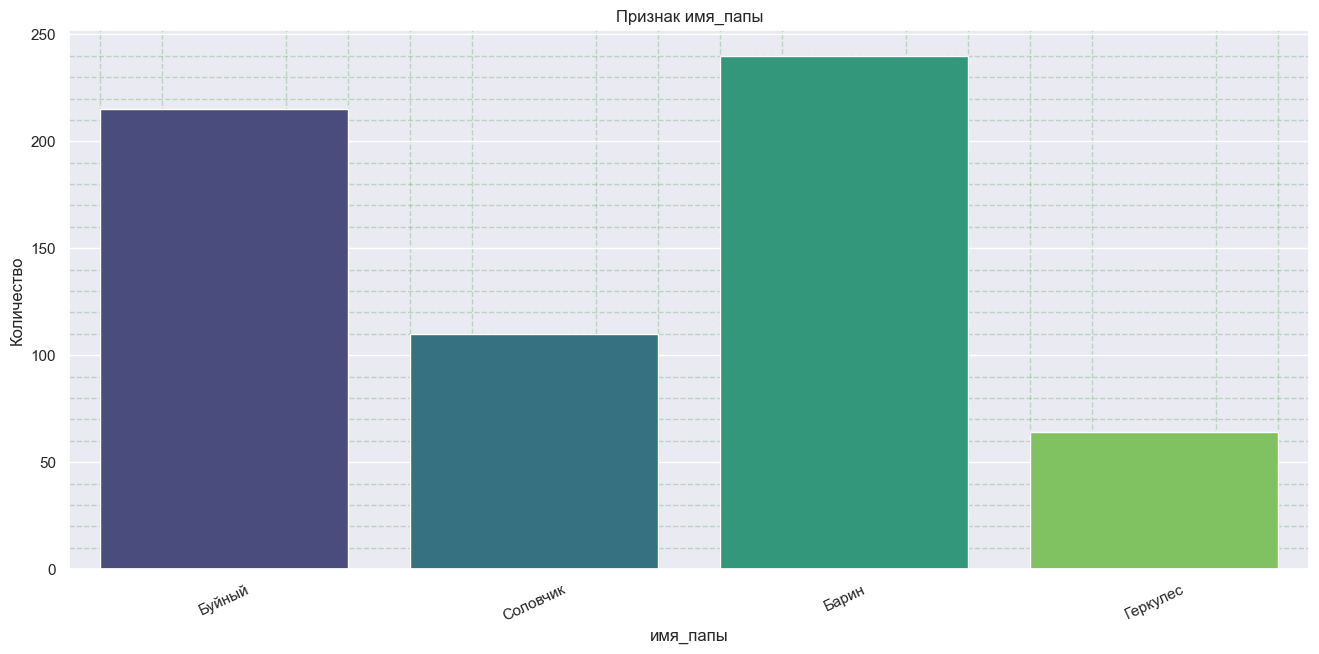

In [28]:
# Строим диаграмму для датафрейма 'ferma_dad'
cat_plot(ferma_dad)

**Вывод** в стаде фермера всего 4 быка, самый плодовитый - Барин.

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


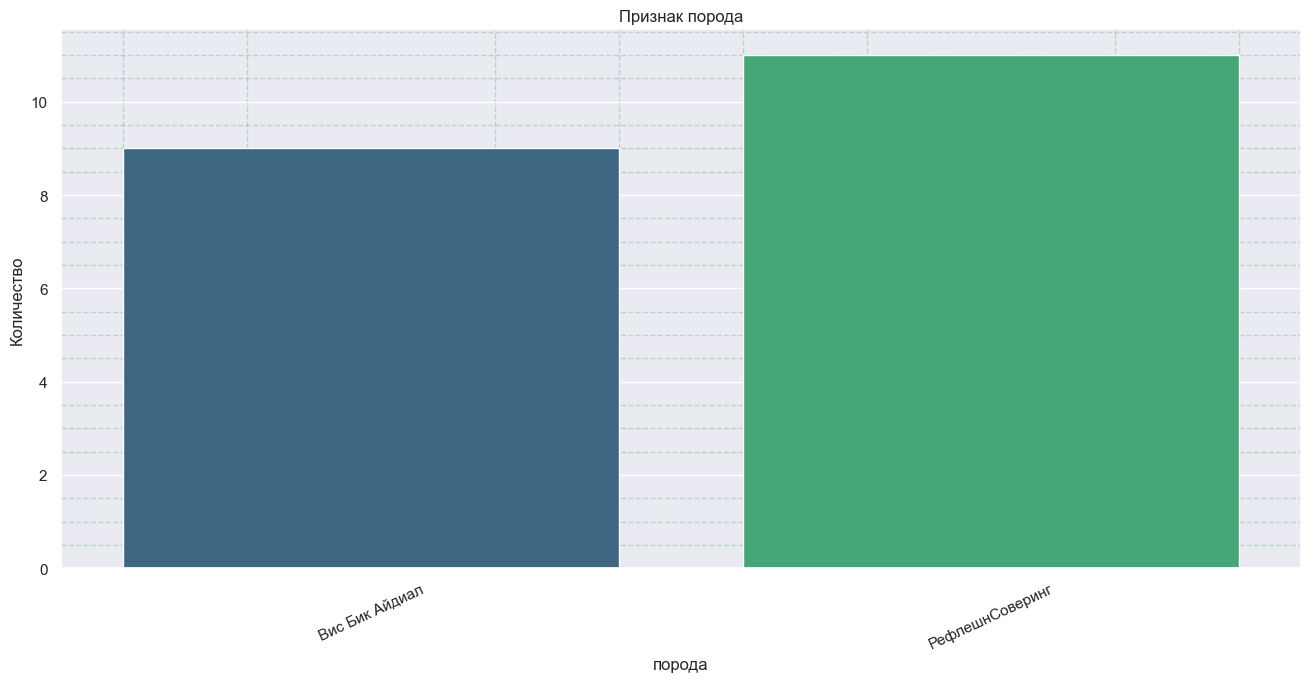

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


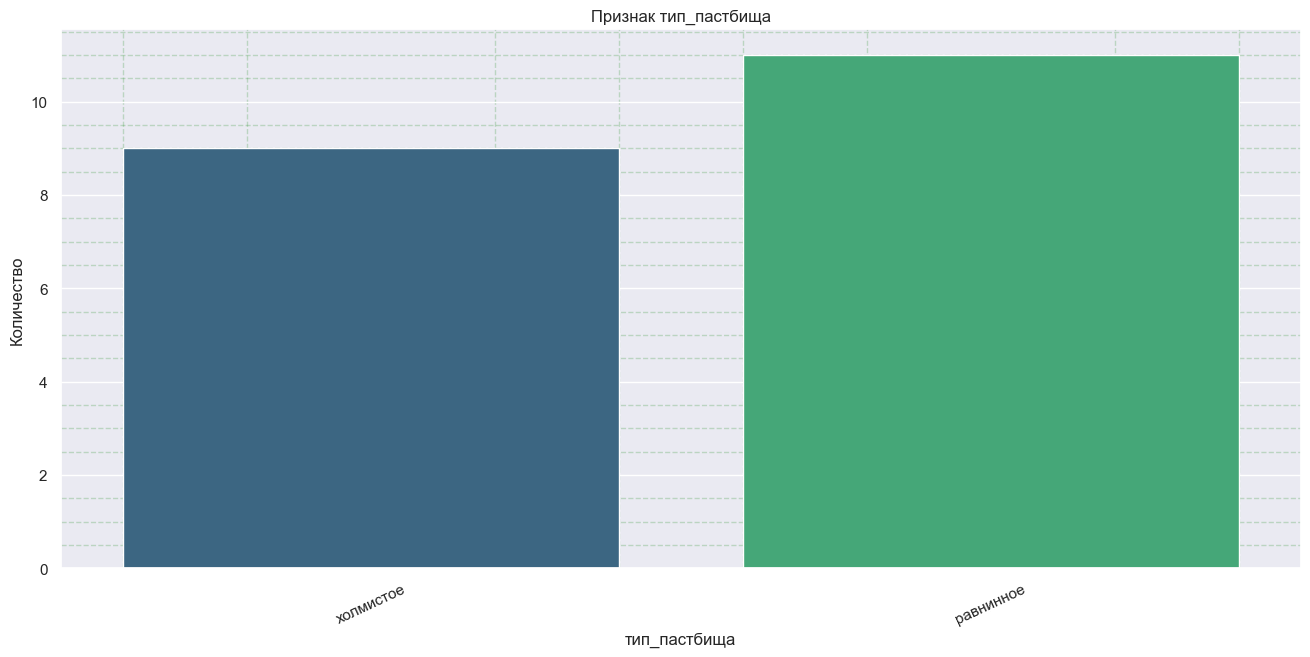

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


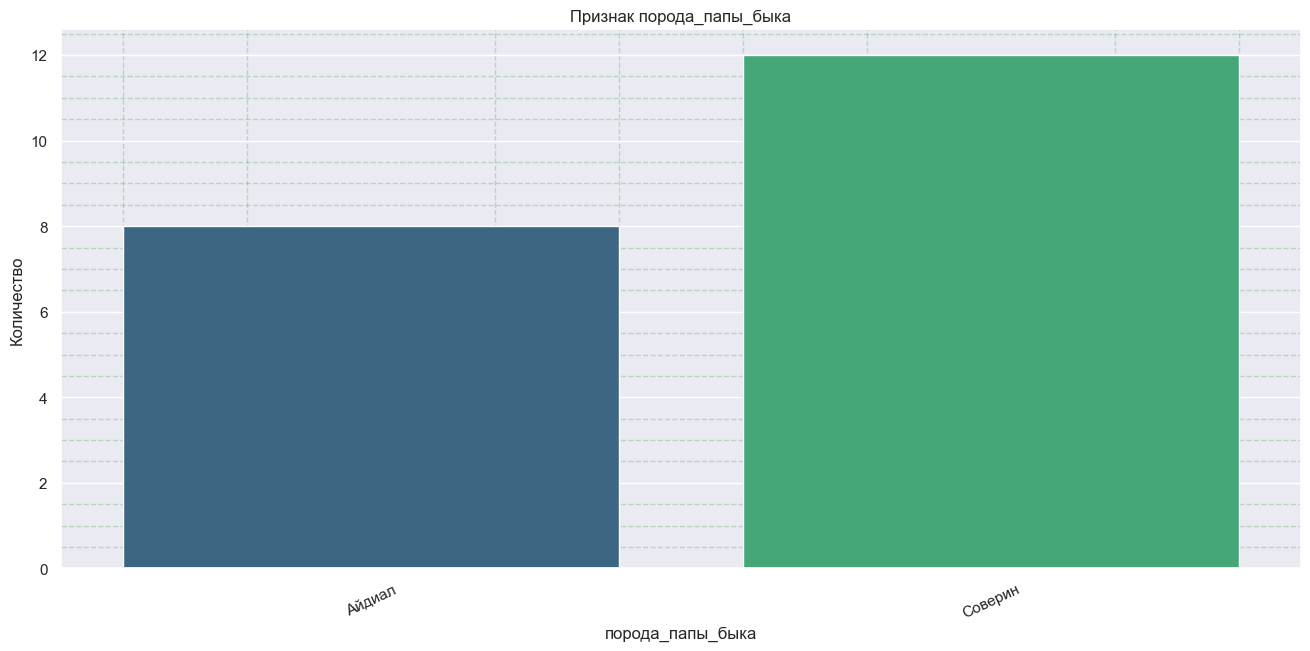

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


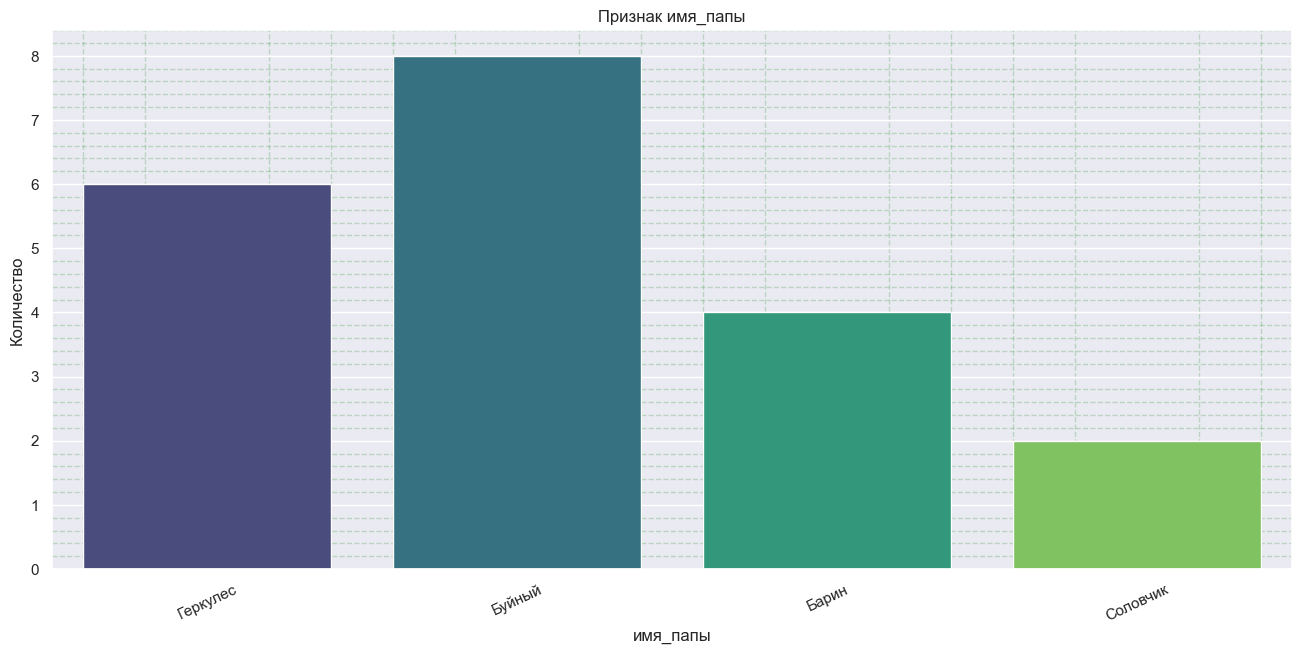

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/851589457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


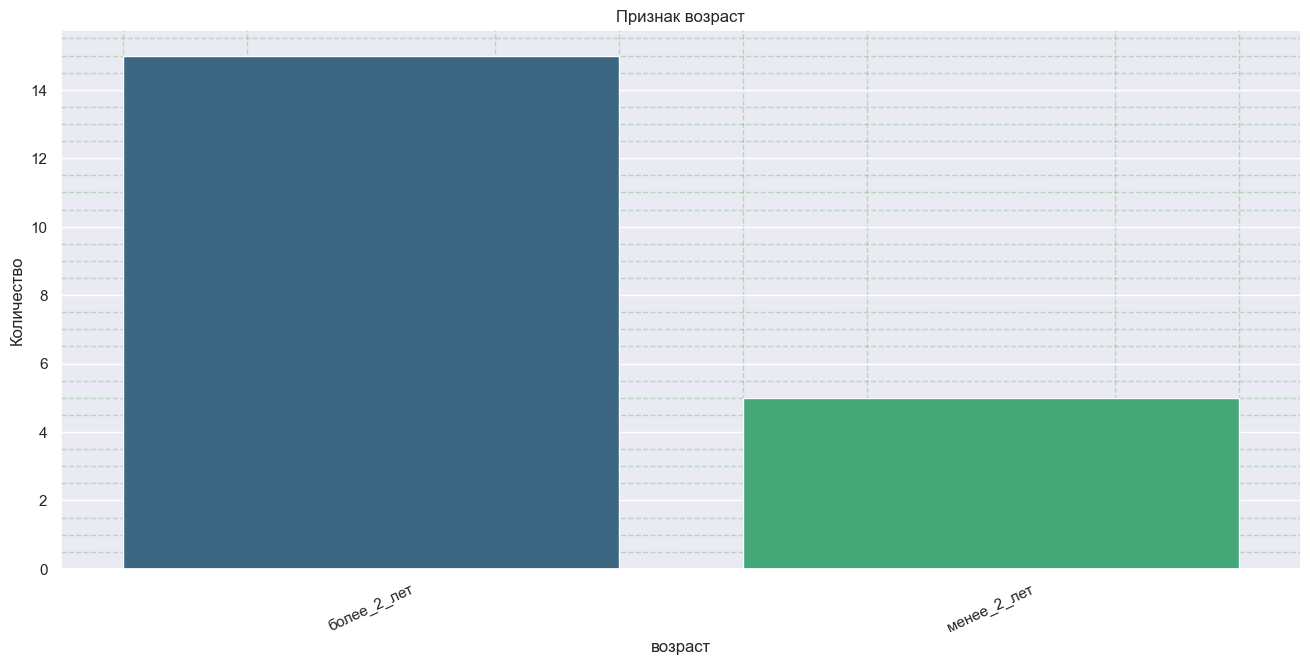

In [29]:
# Строим диаграмму для датафрейма 'cow_buy'
cat_plot(cow_buy)

Количество голов породы Вис Бик Айдиал и РефлешнСоверинг совпадает.

Равнинных пастбищ столько же, сколько холмистых.

Голов с породой папы быка Соверин почти в 2 раза больше, чем Айдиал.

Бык с именем Буйный самый плодовитый.

Возрастных коров в 2 раза больше, чем молодых.

**Вывод:** коровы "ЭкоФермы" в основном возрастные и питаются как на холмистых, так и на равнинных пастбищах.

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Выводы по гистограммам и/или боксплотам (то что вижу я ... для сопоставления наших позиций):

- явная бимодальность в данных. Т.е. надо углублять в анализы подгрупп, прежде чем делать какие-то выводы.

- есть супервыброс по удою. Остальные точки на "ящиках с усами" - можно считать приемлимыми значениями на данном этапе. При моделировании (когда будем выполнять анализ остатков) посмотрим детальнее.

- признаки СПО и Жирность: есть подозрение, что их лучше перевести в категориальную шкалу, т.к. есть большая ассиметрия - скорее всего тут прячутся две-три группы.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Данные загружены, отлично.

Хорошо, что применяешь метод .head()/.sample() таким образом в память не будет загружен весь датасет, объем которого может быть огромным.

Методы .info, .describe, .value_counts(), .unique() как правило часто встречаются и обязательны к применению в задачах по исследованию данных, ведь с их помощью можно получить первые инсайты. 

Итак, мы провели предварительный анализ данных, проверили данные на наличие пропусков и затем обработали их (аргументированно заполнили / удалили / оставили как есть). Провели графический анализ. Сделали и озвучили выводы. Теперь можно приступать собственно к моделированию и ответам на вопросы проекта.

</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>


**Этот шаг спасет твою аналитику (и карьеру):** классический кейс - к аналитику (неважно: DA-аналитику, DS-аналитику, ML-инженеру) прибегает его начальник с горящими глазами: «Срочно нужно посчитать метрики, отчет нужен вчера, Я ЖДУУУУУУУУ!!!!!!!!!!!!!!!!!!!!!!». Аналитик лезет в сырые данные, быстро собирает дашборд … и всё. Ни тебе проверки распределений, ни поиска выбросов, ни визуализации. Начальник на следующий день презентует эти цифры как истину в последней инстанции. А потом на них строятся бизнес-решения стоимостью десятки-сотни миллионов рублей … 

<br>
<br>
<details>
<summary style="color: blue; font-size: 18px; font-weight: bold;">▶ <u>ТАК ДЕЛАТЬ НЕЛЬЗЯ! НИКОГДА!!!</u></summary>

Исследовательский анализ данных (EDA — Exploratory Data Analysis) — это первый и обязательный шаг перед тем, как ты начнёшь считать метрики, строить модели или делать выводы. Он помогает понять, с чем ты на самом деле работаешь, выявить ошибки и аномалии, а самое главное, не попасть в ловушку красивых, но ложных цифр.

Особенно критично это в машинном обучении. Когда ты обучаешь модель на плохих данных, хороший результат невозможен в принципе. В этом смысле работает железное правило: garbage in — garbage out.

Что входит в EDA?

✔️ Осмотр данных. Сколько строк? Какие типы колонок? Что выглядит странно? Уже на этом этапе можно поймать очевидные ошибки. Используй .info(), .describe(), загляни в начало и конец таблицы, проверь типы.

✔️ Пропуски и дубликаты. Пропуски не всегда нужно удалять — иногда лучше заполнить их медианой, модой или предсказанными значениями. А дубликаты — это не только точные копии строк. Часто бывают неявные: например, у одного пользователя два одинаковых заказа с разными ID.

✔️ Очистка и предобработка. Проверка категориальных значений, работа с форматами, единообразие записи. Например, если у тебя в колонке есть и «Санкт-Петербург» и «СПБ» и «Питер», то без нормализации это три разных значения. А если даты хранятся как строки — ты не сможешь нормально их анализировать.

✔️ Выбросы и аномалии. Просто посчитать среднее недостаточно. Построй распределение, используй boxplot. Эти графики мгновенно покажут, где данные выбиваются за границы нормы. И не забывай: один выброс может испортить тебе весь анализ.

✔️ Визуализация. Даже простой scatter plot может рассказать тебе гораздо больше, чем набор агрегатов. Иногда взаимосвязь между переменными становится очевидной только когда ты её увидишь, а не посчитаешь.

EDA — это не про «поковыряться в данных». Это про понять, что ты анализируешь, и быть уверенным в своих выводах. Это защита от ошибок, которые ты даже не успел заметить.

Теперь давай разберём первый и самый недооценённый шаг в исследовательском анализе: осмотр данных.

Представь, что ты лезешь в базу и ... сразу пишешь groupby() или строишь график? Это ловушка. Начинать нужно не с расчётов, а с банального знакомства с тем, что у тебя вообще в руках. Осмотр данных — это как включить свет в темной комнате. Сразу видно, где пыльно, а где стоит тумбочка, об которую легко споткнуться.

Первым делом смотри на объем данных: df.shape покажет, сколько строк и колонок. Иногда там вообще пара десятков строк — и это уже повод позвать дата-инженера. 
Дальше — названия колонок. Через df.columns можно заметить лишние пробелы, странные символы, дубли названий. Здесь же удобно сразу стандартизировать названия: убрать русские слова и привести к единому стилю ("snake_case" ван лав). Такие вещи не бросаются в глаза, но потом ломают пайплайн.

Теперь — в бой идет df.info(). Это твой лучший друг. Он покажет:

▪️какие типы данных у колонок,
▪️сколько ненулевых значений,
▪️сколько памяти жрёт датафрейм.

Обрати внимание: если в колонке написано, что у неё 80 000 непустых значений, а в df.shape[0] у тебя 100 000 — значит, 20% пропусков. Это серьёзно. 
Ещё один лайфхак: если колонка выглядит пустой, но info() говорит, что там всё заполнено — проверь, не строки ли там вроде " " или "None". Это визуальные, а не настоящие пропуски. Так что df.replace() тебе в помощь.

Если всё типы данных соответствуют ожиданиям — отлично. Если нет — можно наткнуться на неприятности. Например, object вместо чисел или дат — и ты не сможешь нормально группировать, фильтровать, делить на категории. В таких случаях сразу меняй тип или уточняй источник.

Следом подключай df.describe(). Это быстрый способ понять, как «живут» числовые данные. Сравни среднее и медиану — это может подсветить асимметричное распределение. Проверь минимум и максимум — там часто сидят выбросы или ошибки: отрицательные значения там, где их быть не должно, нули в колонке с деньгами, тысячи категорий у рейтинга от 1 до 5.

Дополнительно пригодится .nunique(): иногда колонка кажется категориальной, а там каждый второй элемент уникален. Это уже почти ID, и скорее всего — не то, что ты хотел анализировать.

И не забывай смотреть глазами. df.head(), df.tail() — быстрый способ поймать неявные проблемы. Например, даты, которые лежат строками. Или списки внутри ячеек. Или дубли с разницей в один символ. В табличке может быть много неожиданного — особенно если её собирали в два этапа, три человека, а выгружал четвёртый.

Осмотр данных — это про внимательность и здравый смысл. Здесь ты ловишь грубые баги, структурные проблемы и мусор, который может незаметно утащить твою аналитику не туда. А ещё — экономишь себе кучу времени, потому что не придется всё переделывать после того, как уже построен отчёт.

</details>
<br>
<br>
</div>


### **Корреляционный анализ признаков в датасете `ferma_main.csv`**
<a id='corr'></a>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Смотришь скоррелированность признаков - отлично! Об этом чуть ниже подробней напишу....

---
p.s. присмотрись к библиотеке phik! Она (Phi_K correlation) представляет собой инструмент для вычисления и визуализации корреляции между категориальными и количественными переменными. Она может быть полезной в анализе данных перед построением моделей машинного обучения, так как позволяет обнаружить скрытые взаимосвязи между переменными, которые могли бы остаться незамеченными при обычных методах корреляционного анализа.
Преимущества использования **phik**:

1. **Учет категориальных переменных**: Традиционные методы вычисления корреляции, такие как коэффициент корреляции Пирсона, применяются только к количественным переменным. phik позволяет вычислять корреляцию между категориальными и количественными переменными, что делает его мощным инструментом для анализа разнообразных типов данных.

2. **Обнаружение нелинейных зависимостей**: phik способен обнаруживать нелинейные связи между переменными, которые могли бы быть упущены традиционными методами. Это особенно важно в анализе данных, где зависимости могут быть сложными и нелинейными (что может влиять на твой выбор признаков для моделей МО).

3. **Подходит для больших наборов данных**: phik обладает хорошей масштабируемостью, что позволяет использовать его для анализа больших наборов данных без серьезного снижения производительности.

4. **Визуализация результатов**: Библиотека предоставляет инструменты для визуализации матрицы корреляции между переменными, что помогает лучше понимать зависимости в данных.

Вот пример кода, как использовать phik для вычисления корреляции:
    
    # Установим "руками", если не установлена
    !pip install phik -q

    # Импортируем
    import phik
    import pandas as pd

    # Загрузка данных
    data = pd.read_csv('data.csv')

    # Вычисление матрицы корреляции с использованием phik
    corr_matrix = data.phik_matrix(interval_cols= ...)

    # Визуализация матрицы корреляции
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Phi_K Correlation Matrix')
    plt.show()

p.s. при использовании **phik** крайне важно настроить параметр **interval_cols**, передав ему список с названиями **непрерывных признаков**: если этого не сделать, библиотека своими силами будет пытаться разнести признаки по типам, и она зачастую делает в этом ошибки - от этого в свою очередь мы получаем некорректную оценку корреляций, так как от типа признака зависит метод оценки корреляции.

p.p.s. у этой библиотеки есть ограничение с которым я например сталкивался: когда в даных есть столбцы с очень большим количеством уникальных значений, то phik может "упасть" с сообщением об ошибке (суть которого в том, что не хватает памяти для обработки такого количества "уников"). ПРи этом на компьютере у меня 32 Гб памяти и большая часть её не занята. Я подозреваю что это некое внутреннее ограничение библиотеки.
</div>

Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками и построим тепловую карту.

Когда признаки распределены ненормально, стандартный коэффициент корреляции Пирсона может давать искаженное представление о взаимосвязи между признаками, поскольку он предполагает линейную зависимость и нормальное распределение данных. В таких случаях следует использовать альтернативные методы корреляции, которые не делают таких предположений.

In [30]:
# Вычисление матрицы корреляции 
correlation = ferma_main.drop('id', axis=1).phik_matrix(interval_cols= ['удой','эке','сырой_протеин'])
correlation

удой       эке  сырой_протеин       спо    порода  \
удой              1.000000  0.720719       0.463224  0.658321  0.164744   
эке               0.720719  1.000000       0.456484  0.590080  0.123086   
сырой_протеин     0.463224  0.456484       1.000000  0.381242  0.090925   
спо               0.658321  0.590080       0.381242  1.000000  0.000000   
порода            0.164744  0.123086       0.090925  0.000000  1.000000   
тип_пастбища      0.279540  0.106758       0.096474  0.136558  0.213218   
порода_папы_быка  0.519915  0.171355       0.000000  0.537616  0.089330   
жирность          0.692508  0.808210       0.271136  0.836522  0.416409   
белок             0.182953  0.000000       0.166426  0.000000  0.315151   
вкус_молока       0.173122  0.272265       0.176480  0.552169  0.000000   
возраст           0.998101  0.771596       0.351685  0.723291  0.057295   

                  тип_пастбища  порода_папы_быка  жирность     белок  \
удой                  0.279540          0.519915  0.692508  0.182953   
эке                   0.106758          0.171355  0.808210  0.000000   
сырой_протеин         0.096474          0.000000  0.271136  0.166426   
спо                   0.136558          0.537616  0.836522  0.000000   
порода                0.213218          0.089330  0.416409  0.315151   
тип_пастбища          1.000000          0.000000  0.197023  0.125111   
порода_папы_быка      0.000000          1.000000  0.252846  0.145691   
жирность              0.197023          0.252846  1.000000  0.544124   
белок                 0.125111          0.145691  0.544124  1.000000   
вкус_молока           0.269063          0.000000  0.159853  0.097222   
возраст               0.128455          0.355817  0.704471  0.027471   

                  вкус_молока   возраст  
удой                 0.173122  0.998101  
эке                  0.272265  0.771596  
сырой_протеин        0.176480  0.351685  
спо                  0.552169  0.723291  
порода               0.000000  0.057295  
тип_пастбища         0.269063  0.128455  
порода_папы_быка     0.000000  0.355817  
жирность             0.159853  0.704471  
белок                0.097222  0.027471  
вкус_молока          1.000000  0.165974  
возраст              0.165974  1.000000

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>



Нормально ли распределены наши признаки? Если нет, то каким методом надо считать коэффициенты корреляции?
    
Небольшая напоминалка на скрине: Пирсон - это дефолтный метод.
</div>

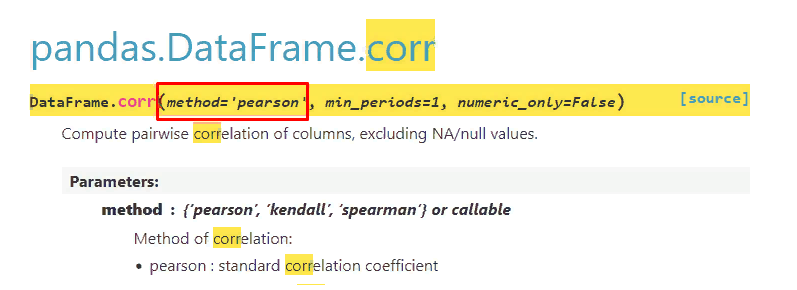

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Отлично! Действительно, при использовании **phik** крайне важно настроить параметр **interval_cols**, передав ему список с названиями непрерывных признаков: если этого не сделать, библиотека своими силами будет пытаться разнести признаки по типам, и она зачастую делает в этом ошибки - от этого в свою очередь мы получаем некорректную оценку корреляций, так как от типа признака зависит метод оценки корреляции.

---
Возможный вопрос: **... я все равно не понимаю зачем в interval_cols передавать именно непрерывные признаки, после моих исправлений, матрица практически не изменилась ...**

Ответ: итак, зачем в interval_cols передавать именно непрерывные признаки? Библиотека phik рассчитывает обобщённую корреляцию между переменными, в том числе категориальными и числовыми. Для числовых (интервальных) признаков phik автоматически бинит значения в интервалы (бины), чтобы можно было строить кросс-таблицы и считать корреляцию.

Непрерывные признаки (например, "выручка", "длительность" с большим количеством уникальных значений) хорошо подходят для биннинга, потому что их значения равномерно распределены по диапазону, и разделение на бины даёт осмысленное представление о распределении значений.

Дискретные признаки (например, "количество акционных покупок" с 10 уникальными значениями) при биннинге могут терять смысл: если уникальных значений мало, то бины будут крупными и не отразят реальную структуру данных.

*Почему матрица почти не изменилась после исправлений?*
Если убралать из interval_cols признаки с малым числом уникальных значений (дискретные), а оставить только действительно непрерывные, то биннинг станет более корректным, но если в данных изначально мало действительно непрерывных признаков, то итоговая матрица phik действительно изменится не сильно. Это связано с тем, что phik хорошо работает и с категориальными переменными, и если большинство признаков дискретные, то их вклад в матрицу корреляций будет примерно одинаковым независимо от того, как они определены (категориальными или интервальными).

*Почему не стоит передавать дискретные признаки в interval_cols?*
- Потеря информации: Если признак с 20 уникальными значениями разбить на 10 бинов, то в каждом бине окажется по 2 значения — это грубое усреднение и потеря детализации.

- Смысл биннинга: Для дискретных признаков биннинг не добавляет смысла, а наоборот, может исказить структуру данных.

- Категориальные признаки: Лучше оставить такие признаки категориальными — phik корректно считает корреляции между категориальными переменными без биннинга.

*Если нет непрерывных признаков — можно ли уменьшить число бинов?*
Да, можно уменьшить параметр bins (например, до 5), чтобы избежать чрезмерной агрегации, но это не решит проблему, если признак изначально дискретный. Биннинг нужен для того, чтобы "категоризировать" непрерывные значения, а не дискретные.

</div>

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>



Как думаешь, насколько корректно анализировать корр.связь **id** с другими признаками?
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

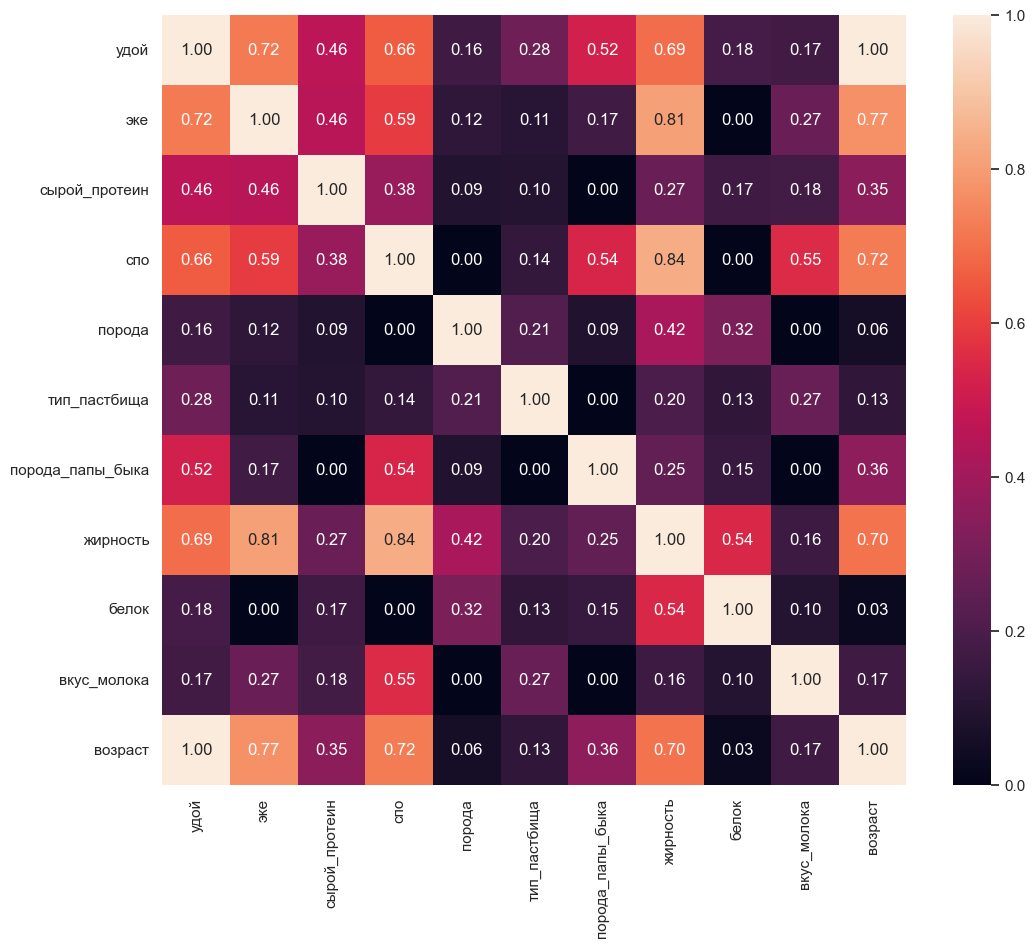

In [31]:
# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f') ;

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>



Как думаешь, насколько корректно анализировать корр.связь **id** с другими признаками?
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

**Вывод:** Мы наблюдаем сильную прямую связь между признаками `удой` и `эке`, среднюю прямую связь между признаками `удой`и`сырой_протеин, спо, порода_папы_быка, жирность`, а также слабую прямую связь между `удой` и `порода, тип_пастбища, белок, вкус_молока`. 


**Мультиколлинеарность** между входными признаками **не наблюдается**. Коэффициент корреляции от 0.9 до 0.95 по модулю отсутствует. 

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Выводы **с учётом того, что уже выполено тобой в проекте, выше** (то что вижу я ... для сопоставления наших позиций):

- очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет.

- есть подозрение на нелинейность связи удоя с "спо" и "жирностью".

- по спо: постоянная зависимость на разных уровнях. до 0.91 - одна зависимость с целевой. После 0.91 - иная. Просто "видим" две группы (некоторые "видят" 3). Надо ввести новую категориальную переменную: "спо менее 0.9"/"спо более 0.9".

- По жирности: история такая же. Наблюдается три зоны с разной зависимостью с целевой: до 3.5, и ещё две - на моем графике все 3 выделены красными прямоугольниками.
</div>

Для модели линейной регрессии линейная зависимость между целевыми и входными признаками обязательна, иначе предсказания будут ошибочными. Посмотрим на взаимосвязь между целевым признаком `удой` и входными.


Построим диаграммы рассеяния для признака `Удой, кг` и всех количественных признаков с учётом значения категориальных признаков.

/var/folders/c3/s4tf13zx1ps6kcy79_nw6cz40000gn/T/ipykernel_49679/443246937.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,7))


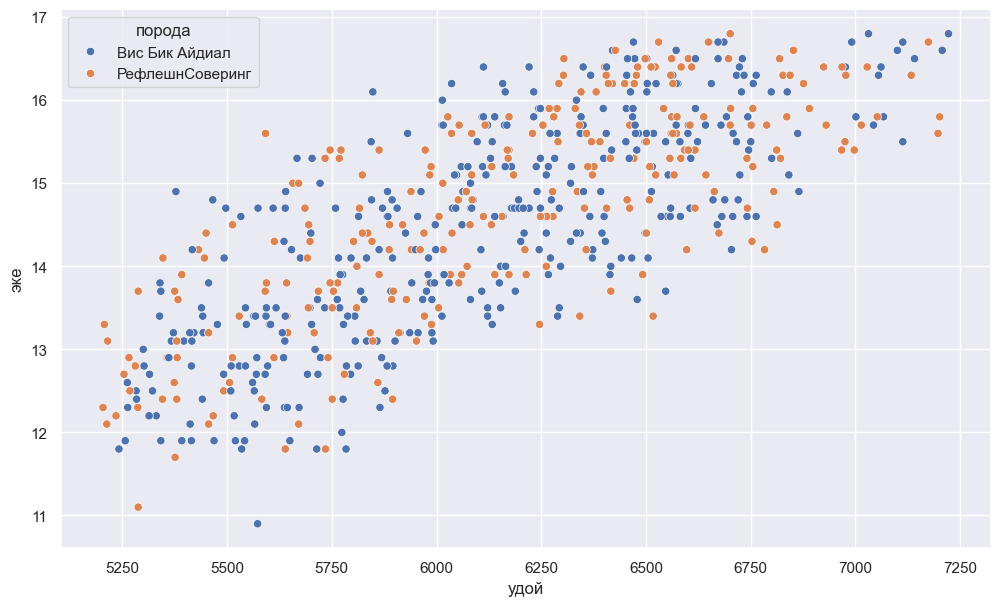

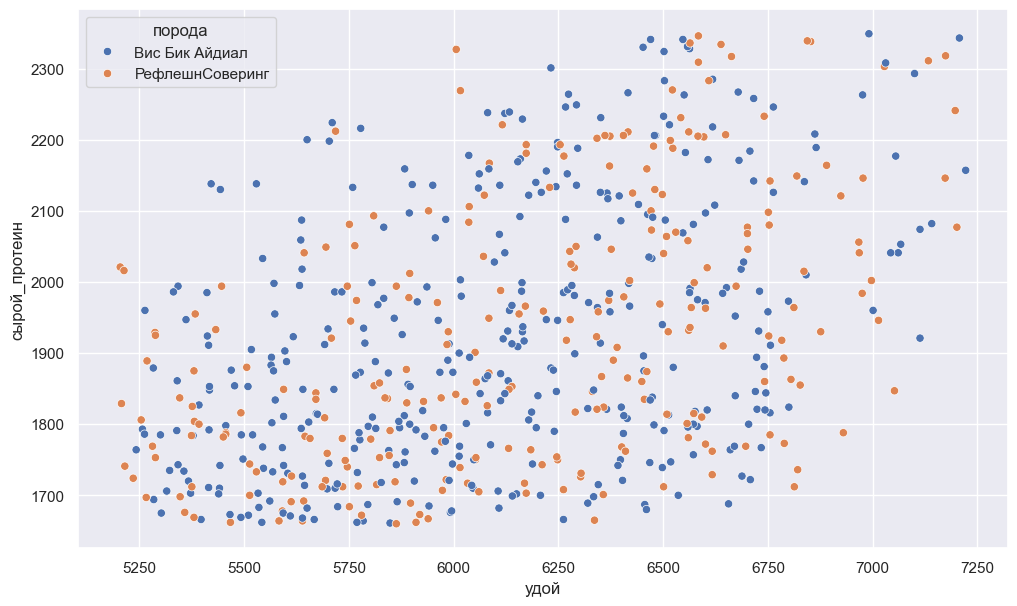

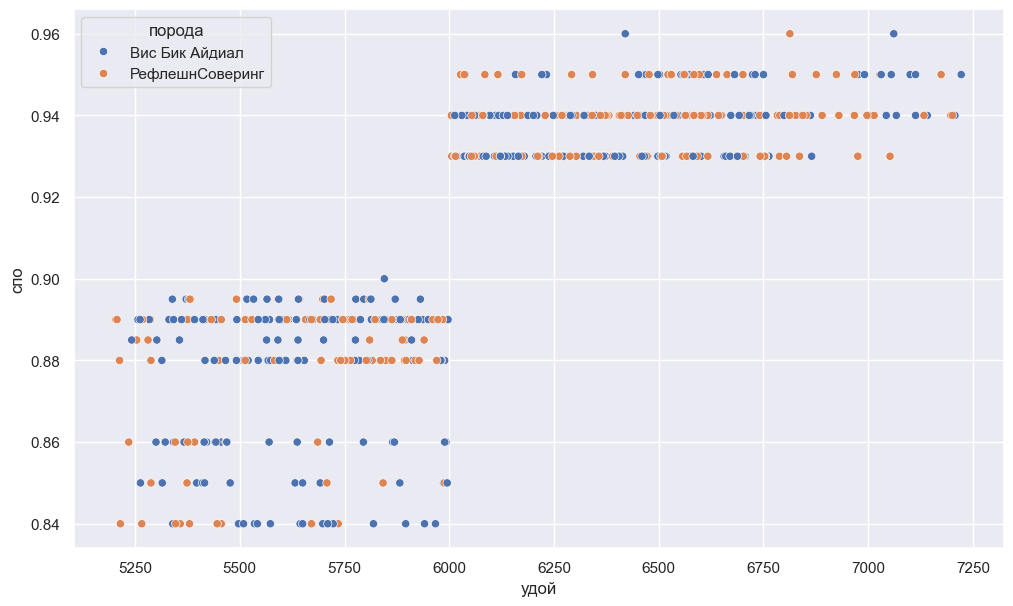

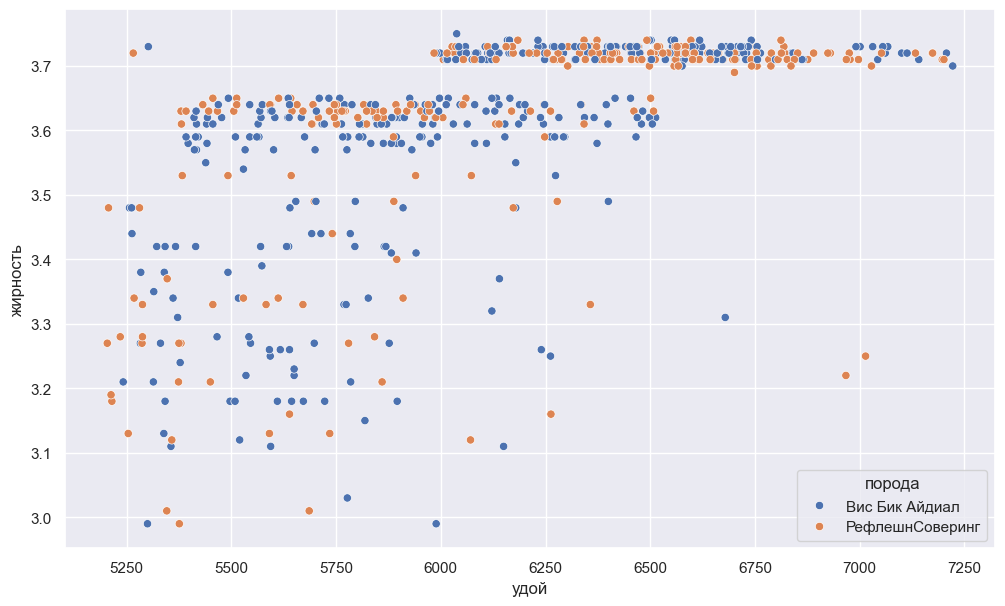

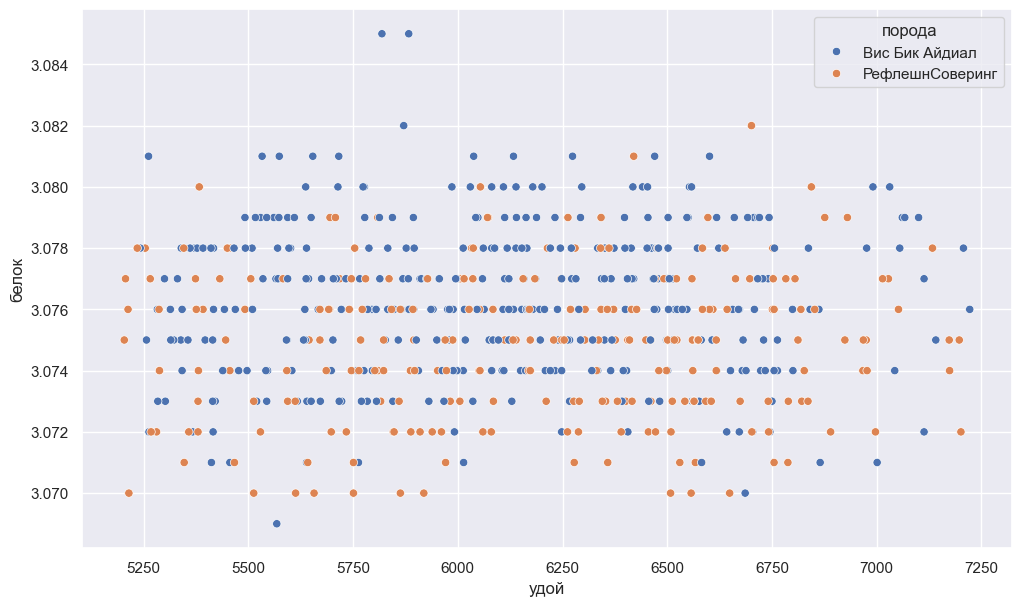

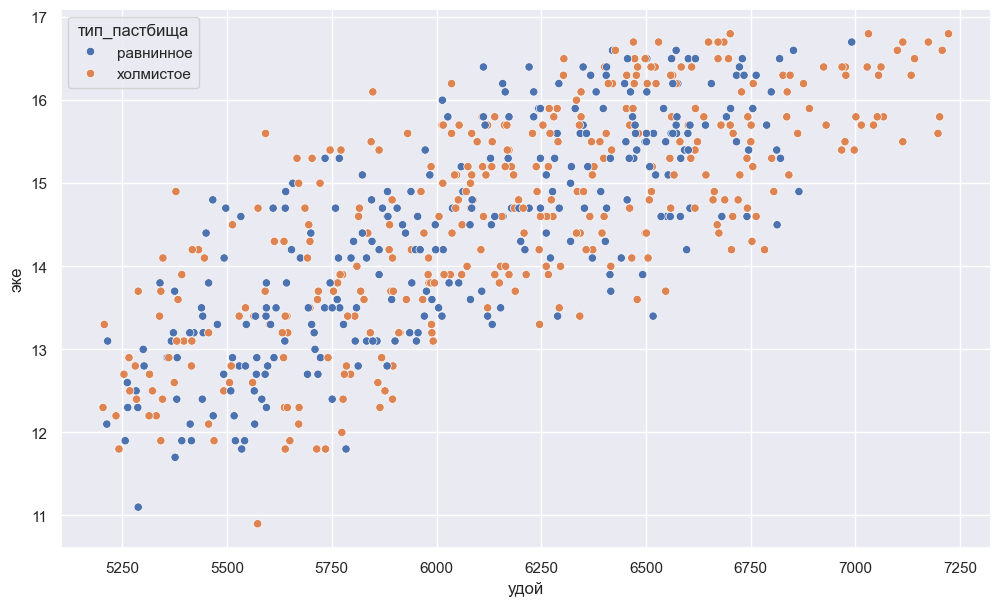

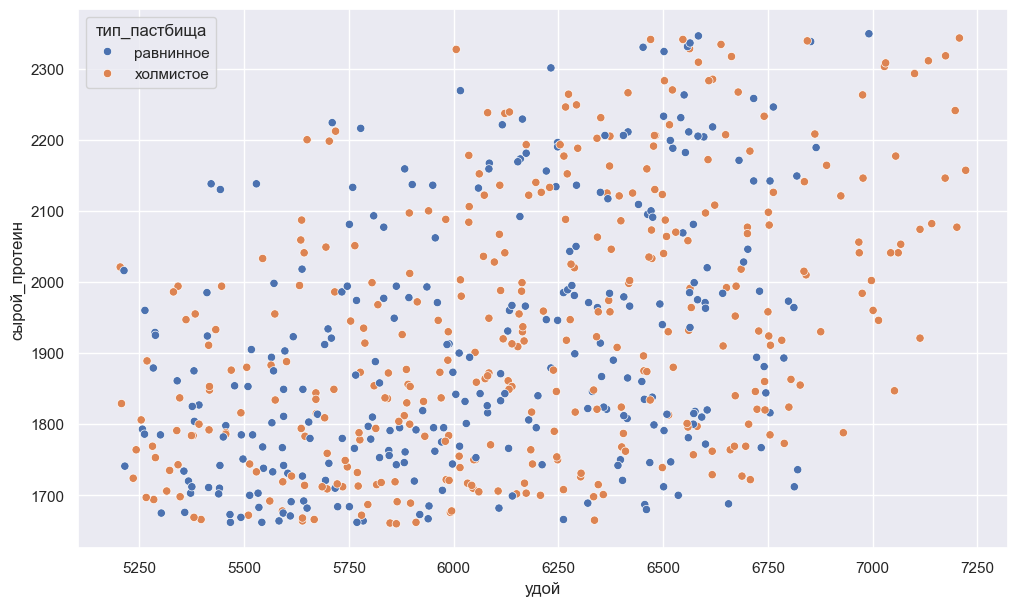

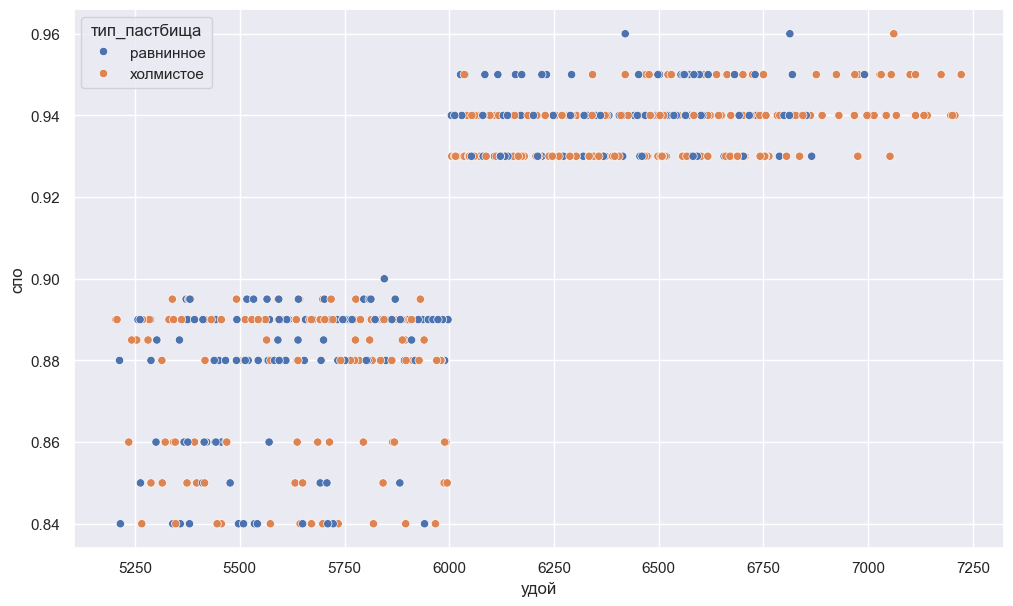

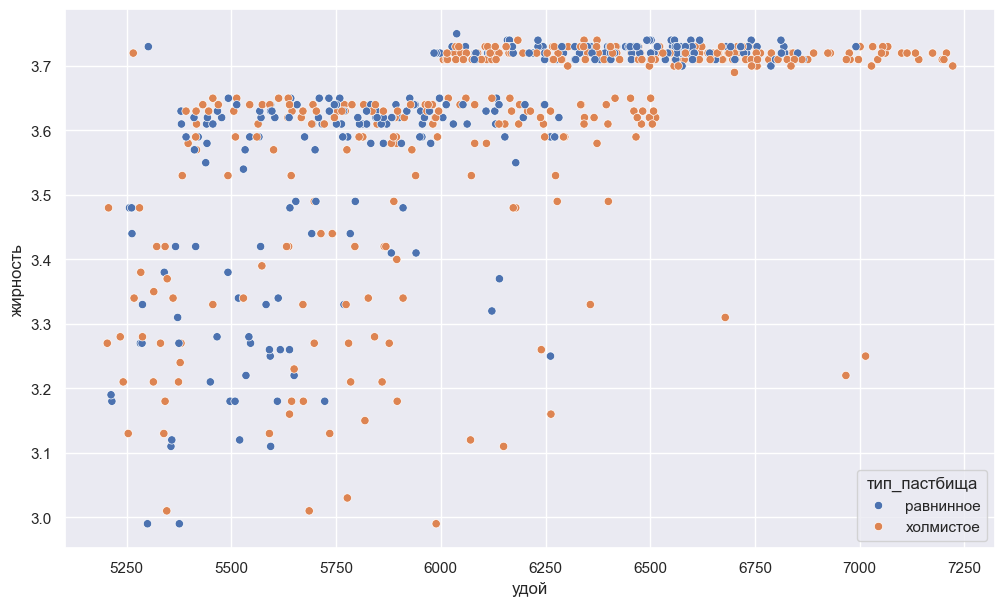

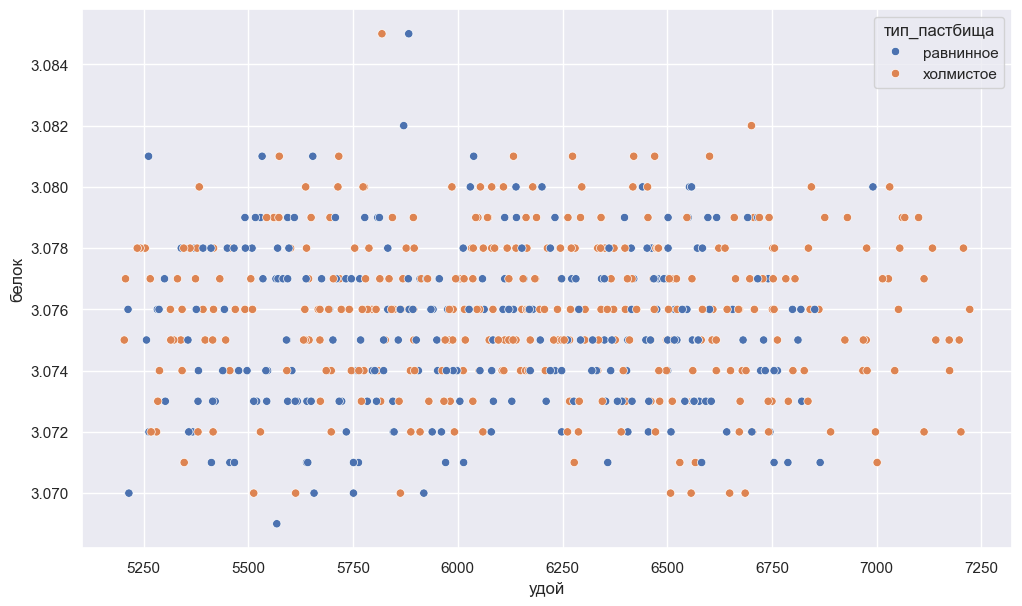

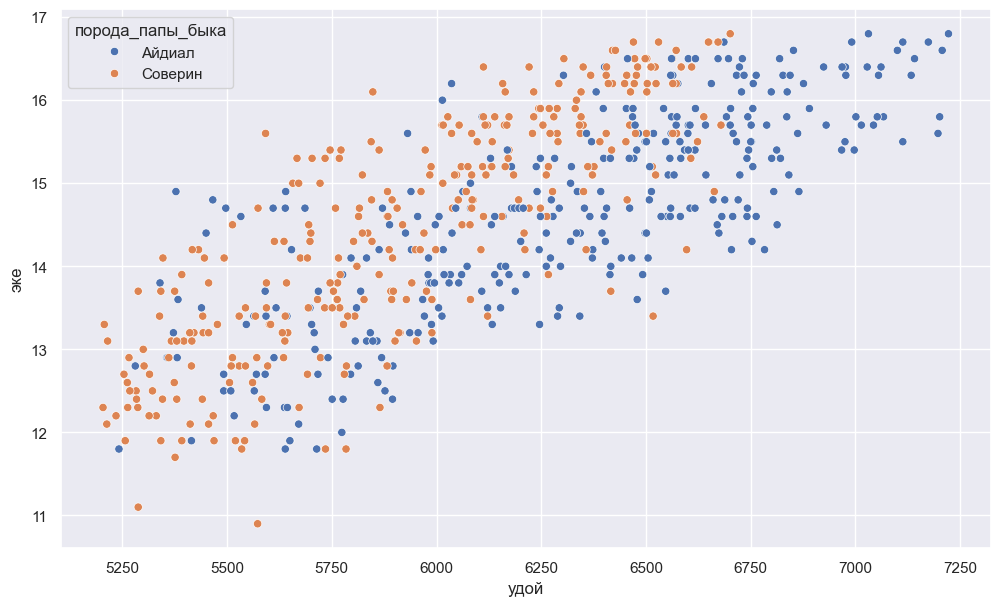

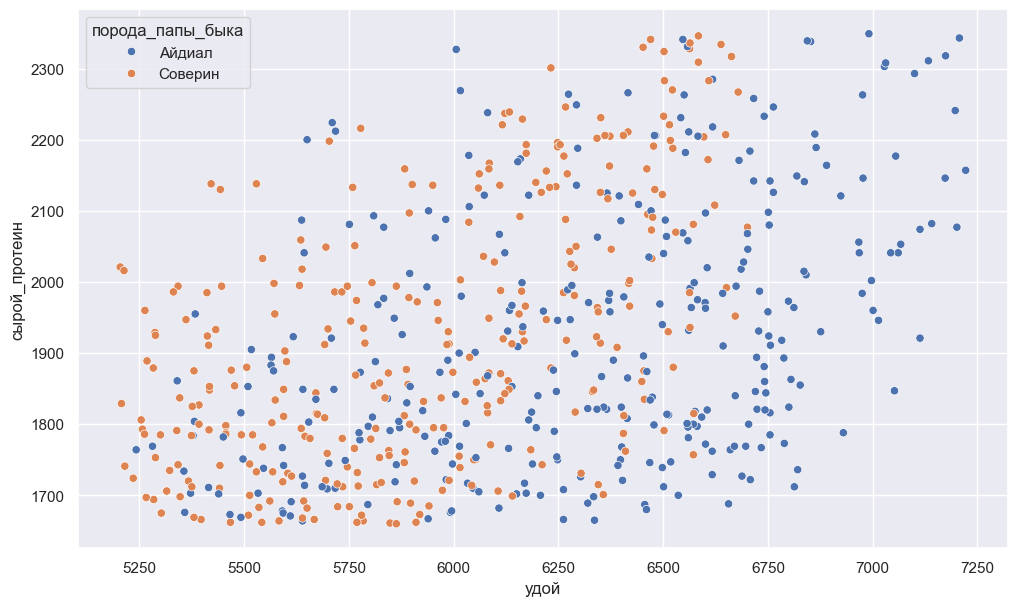

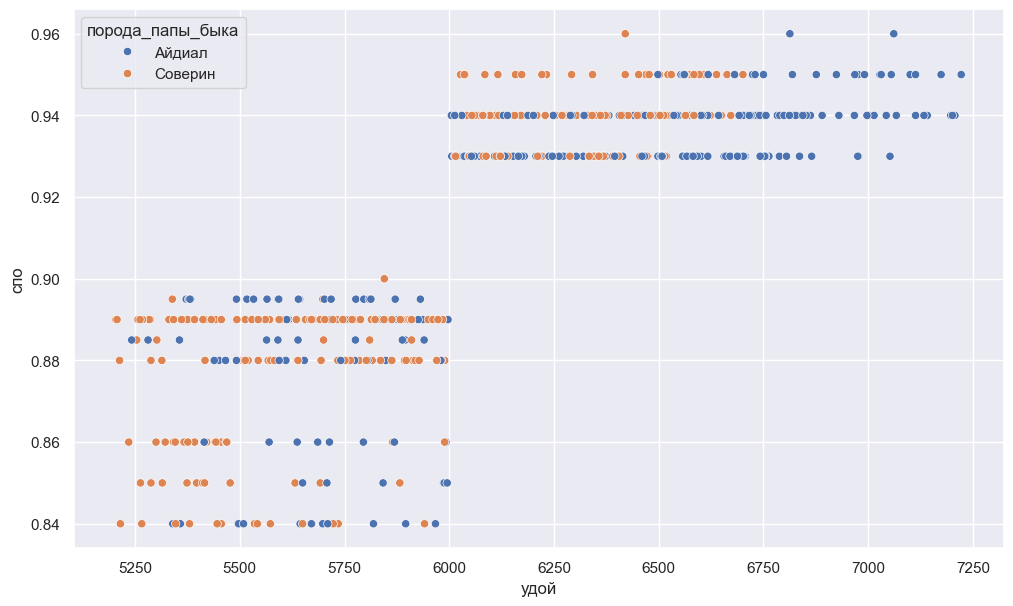

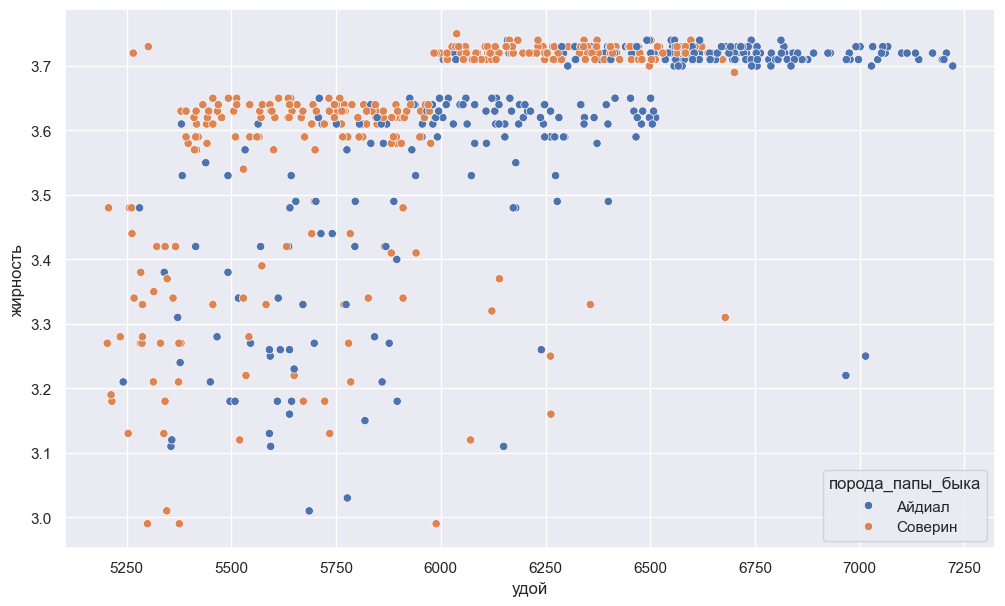

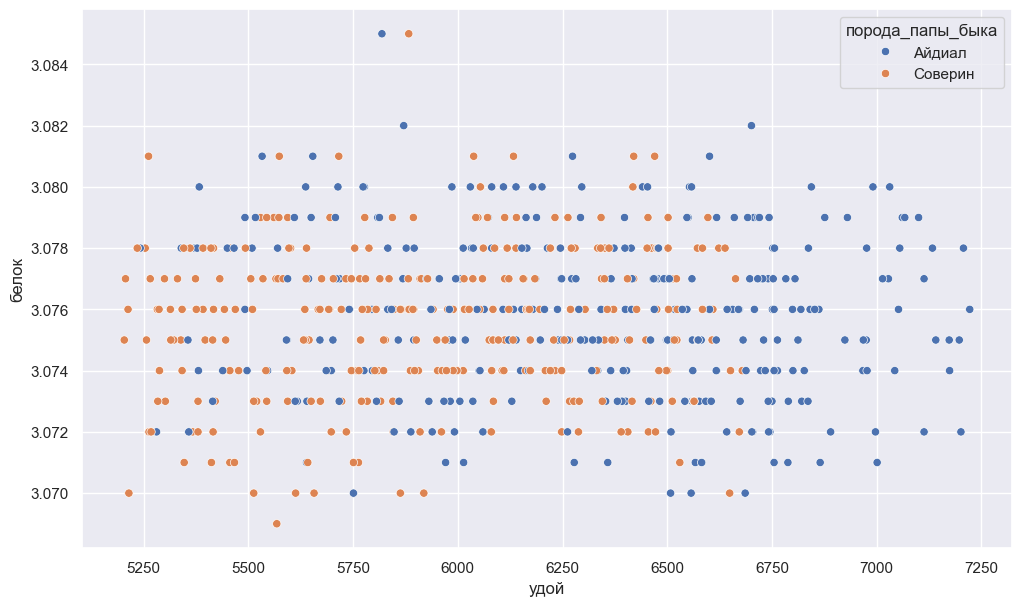

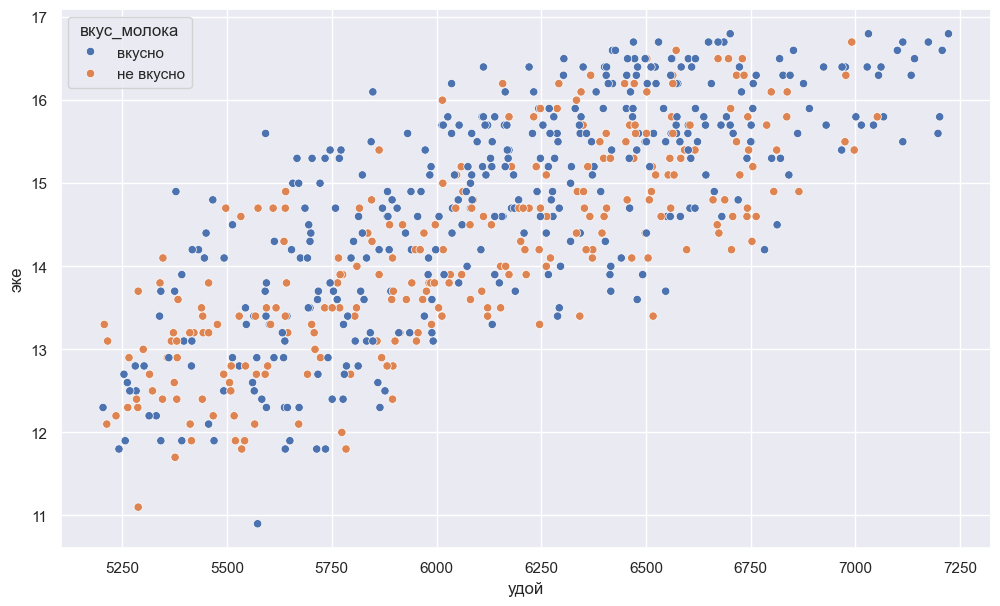

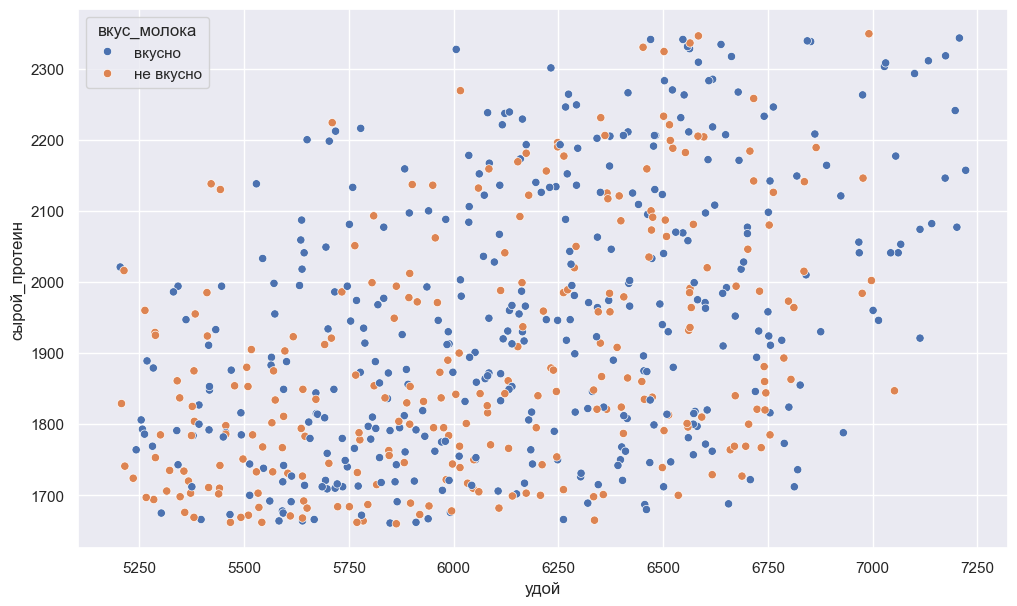

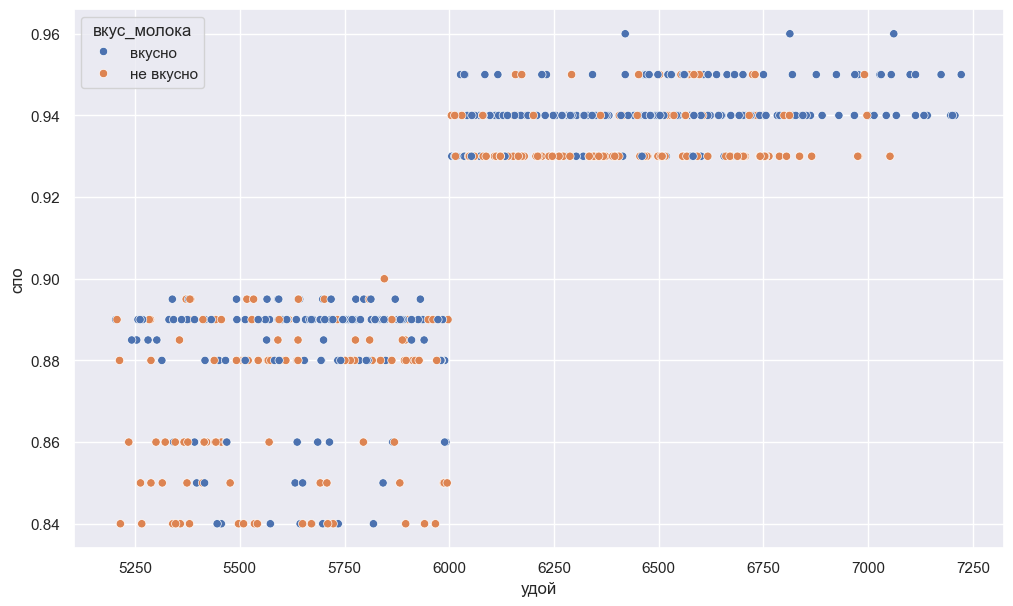

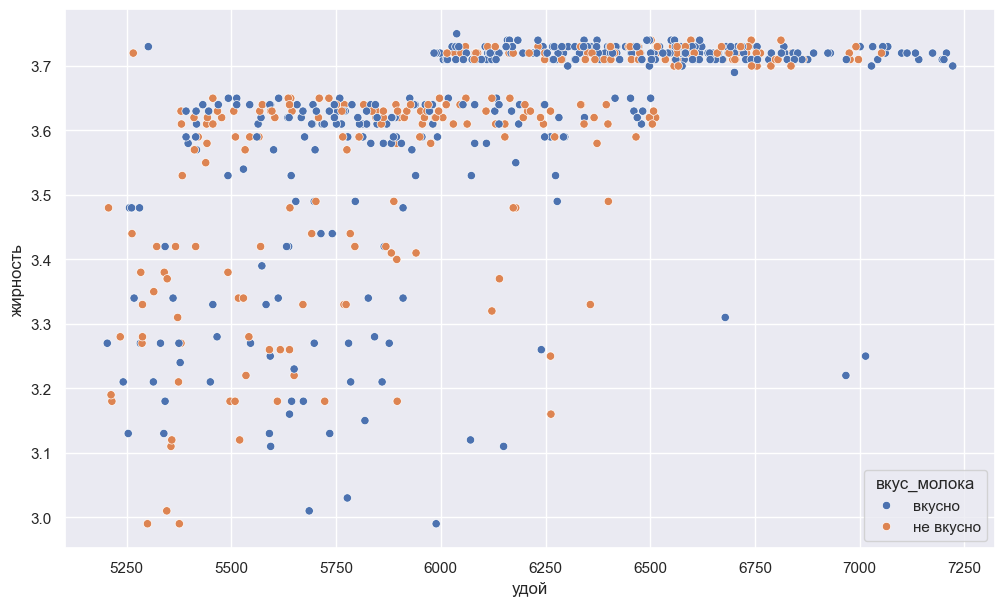

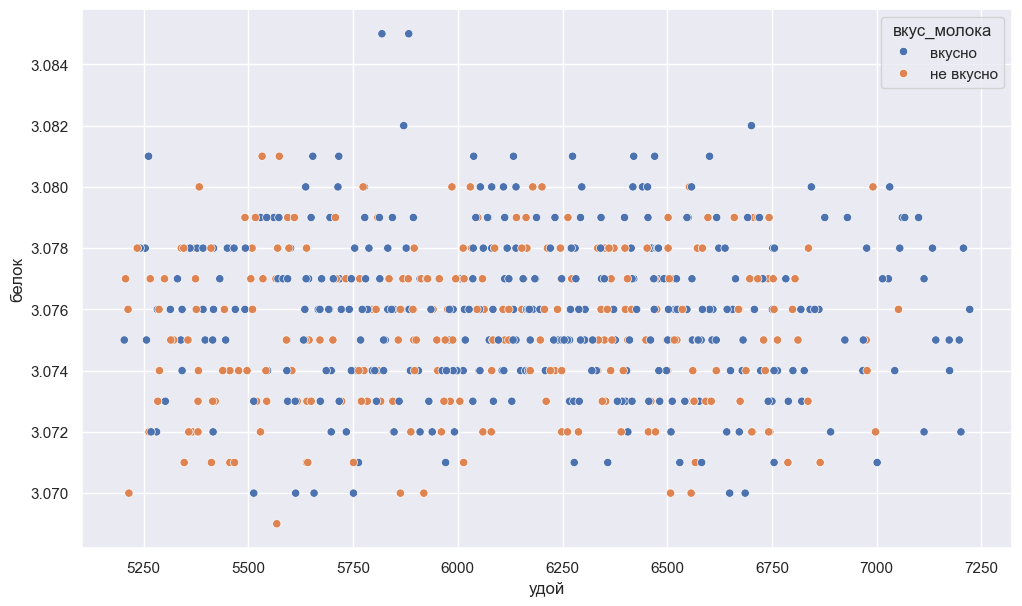

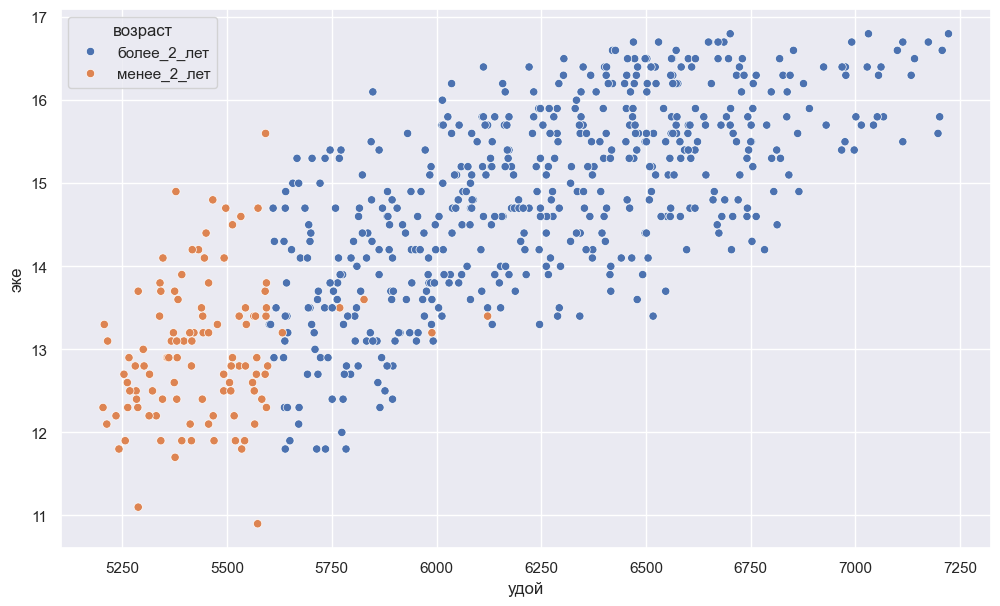

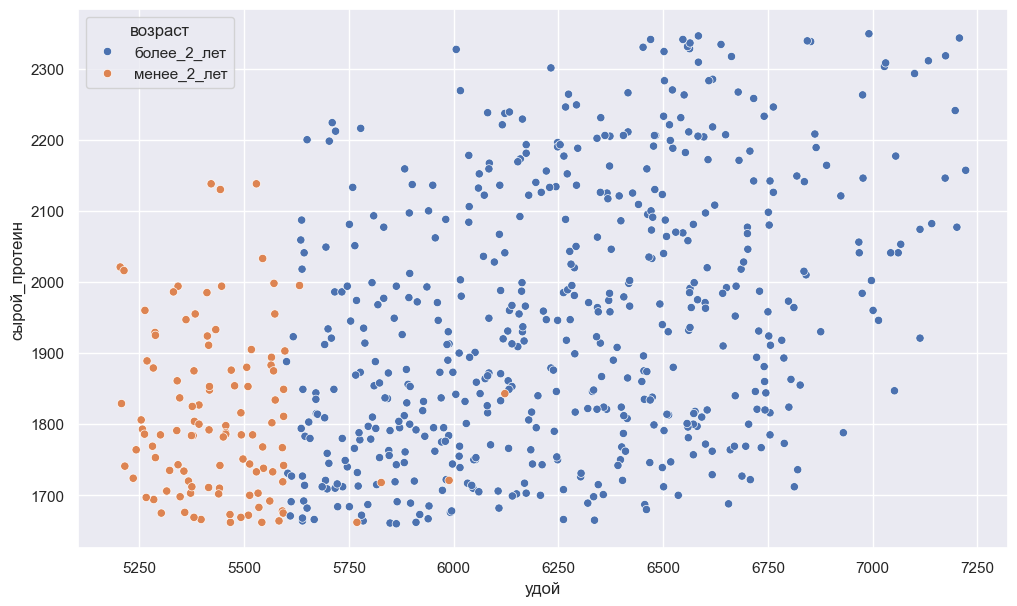

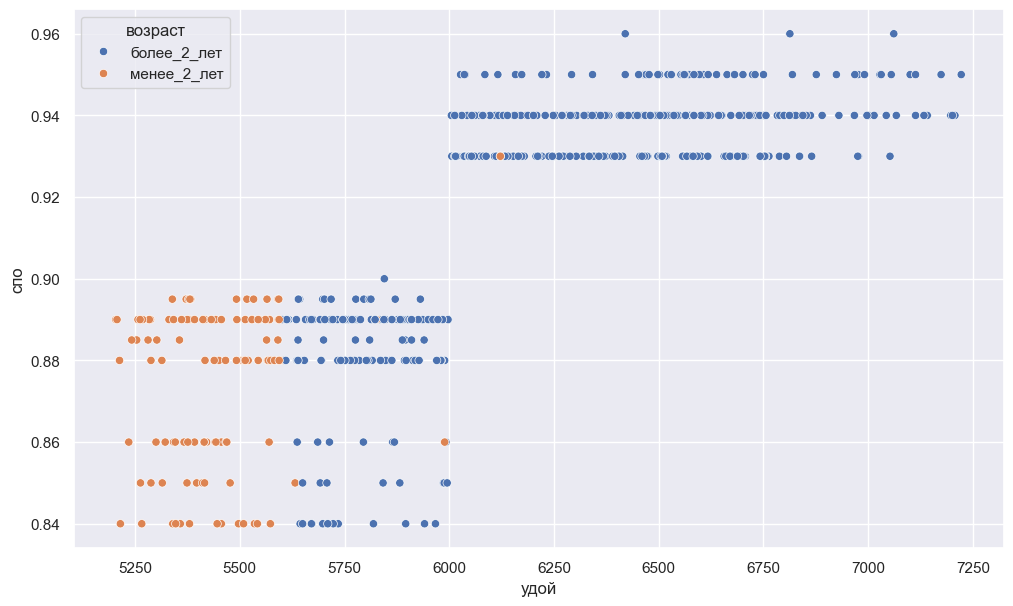

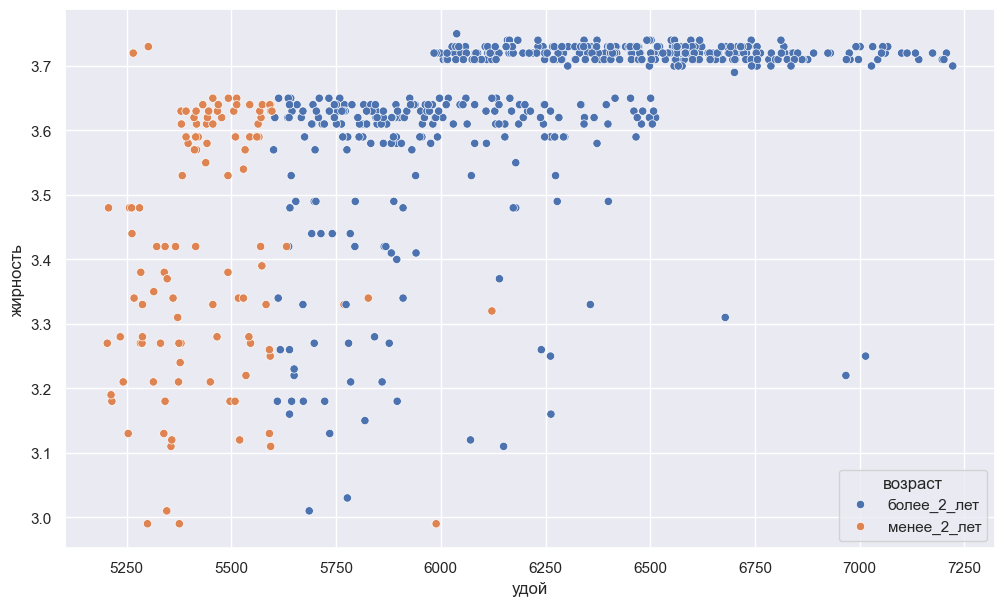

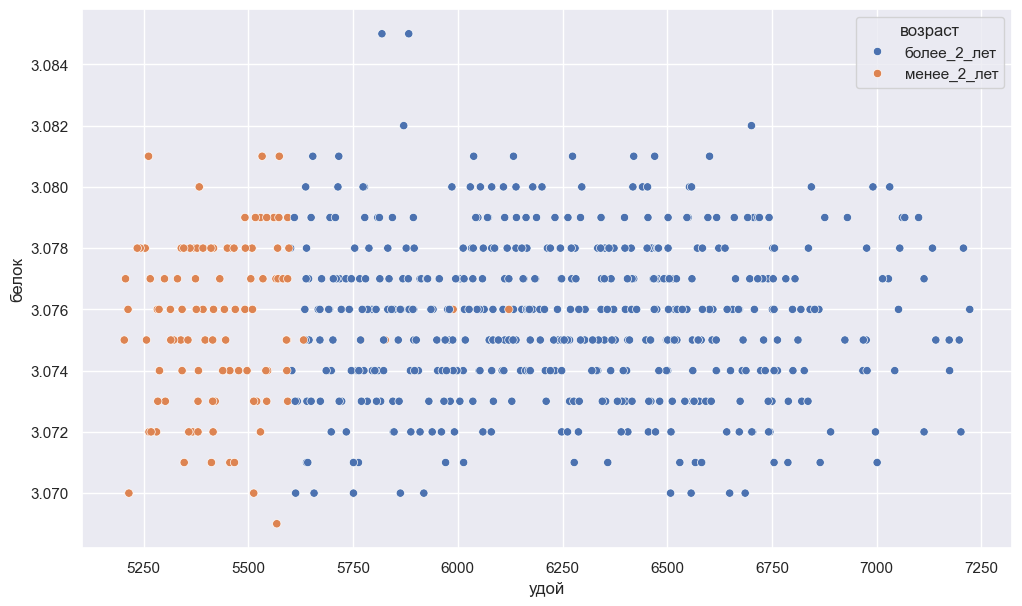

In [32]:
for cat in ferma_main.select_dtypes(include=['object']).columns:
    for col in ferma_main.select_dtypes(include=['int','float']).columns:
        if col not in ['удой','id']:
            plt.figure(figsize=(12,7))
            sns.scatterplot(data=ferma_main, x='удой', y=col, hue=cat);

<div class="alert alert-warning">
<b>Комментарий 👉</b>



На примере моего(!) скрина отчётливо видно что ЭКЕ с удоем связно нелинейно (квадратично) и возведение ЭКЕ в степень улучшит наверняка линейную модель. 

Также видно что СПО имеет смысл перевести в категорию (на уровне между 0.91 - 0.92, примерно ... тоже на примере моего скрина).

p.s. **Эти 2 графика (с "добавлениями" на них) - они к тому, что волшебства в решении сделать СПО категориальным, а ЭКЕ квадратичным нет. Это решение мы принимаем не потому что нас осенило, а потому что нам графики это показывают. Это первый важный момент который не всегда мы чётко понимаем. Но есть и 2ой важный момент. Визуализации в ДА/ДС проекте - это не просто "красивые картинки". Это отображение данных в том виде, который позволяет РЕШЕНИЯ ПРИНИМАТЬ.**
</div>

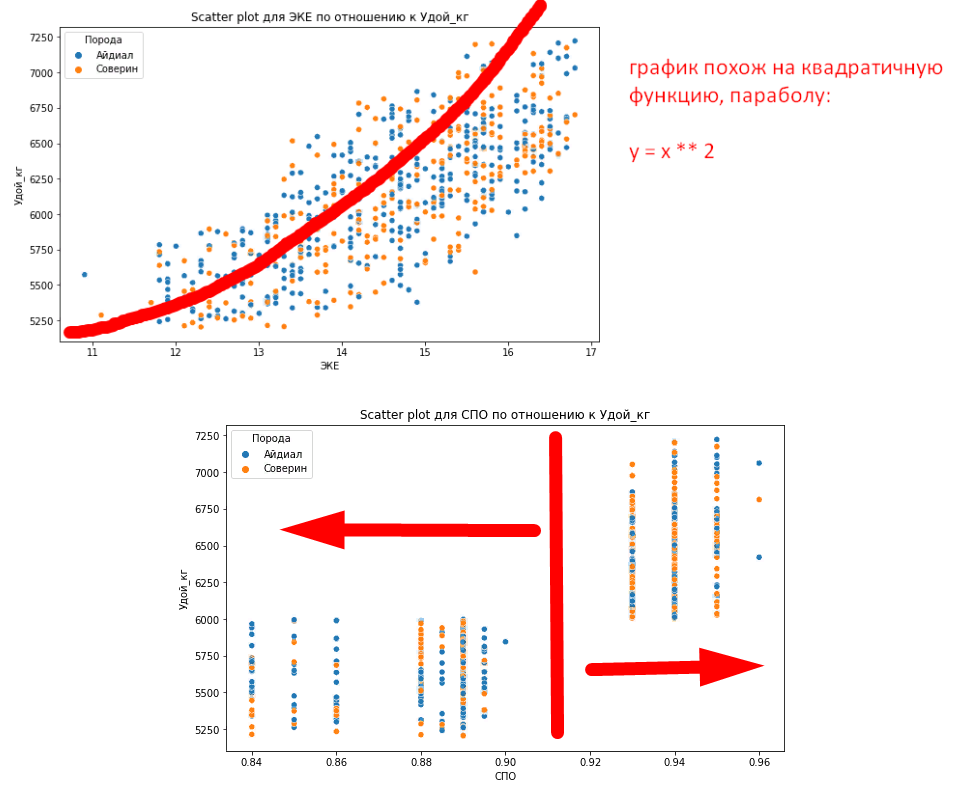

**Вывод:** связь между целевым признаком и:

-  `сырой_протеин`, `белок` для *разных пород, пастбищ, пород папы быка, вкусов молока, возрастов*  **линейная**;


- `спо`, `жирность`,`эке` для  *разных пород, пастбищ, пород папы быка, вкусов молока, возрастов* **нелинейная**;


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Выводы **с учётом того, что уже выполено тобой в проекте, выше** (то что вижу я ... для сопоставления наших позиций):

- можем сказать, что выводы теже, что и в пункте выше: есть не линейность с спо и жирностью во всех группах. Однозначно стоит создавать новые факторы.

- по мультиколлинеарности: скорее всего её нет (нет "узкого облака", похожего на четкую линейную зависимость). 
    
- по эке - возможно иная зависимость между целевой и эке. Наверное надо попробовать "ввести нелинейность" (квадрат этого фактора), чтобы учесть кривизну. Результат (есть ли положительный эффект) проверим ниже, во 2ой линейной модели.

- отлично видно, что возраст влият на удой. Более молодые коровы меньше дают молока.

- видно, что спо только для возрастных коров используется.
    
p.s. некоторые зависимости, которые я здесь описываю - я взял не просто из головы, а потому что сам этот проект выполнял (и скаттерплоты (sns.scatterplot()) "рисовал"). Если построишь аналогичные зависимости - увидишь подтверждение моим словам.
</div>

### **Обучение модели линейной регрессии**
<a id='linear'></a>

Создадим трансформеры для преобразования текстовых данных и числовых значений, а затем построим пайплайн, который последовательно применяет эти трансформеры и завершается обучением модели.

In [33]:
# Масштабируем числовые значения
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

# Кодируем категориальные значения
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore'))]
)

# Трансформер для масштабирования и кодирования данных
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

# Пайплайн для модели регресии
model_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

# Пайплайн для модели классификации
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#### **Первая модель**

Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

В качестве целевого возьмем `удой`.

Входные признаки, которые подходят для модели линейной регрессии: 

- порода, порода_папы_быка, возраст - потому что это харастеристики коровы, удой которой мы хотим узнать;

- эке, сырой_протеин - у этих признаков линейная связь с целевым;

- спо, тип_пастбища - харастеристика корма и среды обитания коровы.


In [34]:
# Разметим данные
X = ferma_main[['порода', 'порода_папы_быка', 
                'возраст', 'эке', 'сырой_протеин', 
                'спо','тип_пастбища']]
y = ferma_main['удой']

Разобьем данные на тренировочную и тестовую выборки.

In [35]:
# Разделим данные на выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [36]:
# Посмотрим на разбиение
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(471, 7) (157, 7) (471,) (157,)


Мы убедились в правильности выполнения разбиения, теперь обучим модель линейной регрессии на подготовленных данных.

In [37]:
# Обучаем модель на тренировочных данных
model_lr.fit(X1_train,y1_train)
# Получаем предсказания
y1_pred = model_lr.predict(X1_test)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируем остатки с помощью графиков.

In [38]:
# Рассчитаем коэффициент детерминации
r2 = r2_score(y1_test, y1_pred)
r2

0.7844078173416968

В 78% случаев предсказание модели ближе к истине, чем среднее значение целевого признака. 

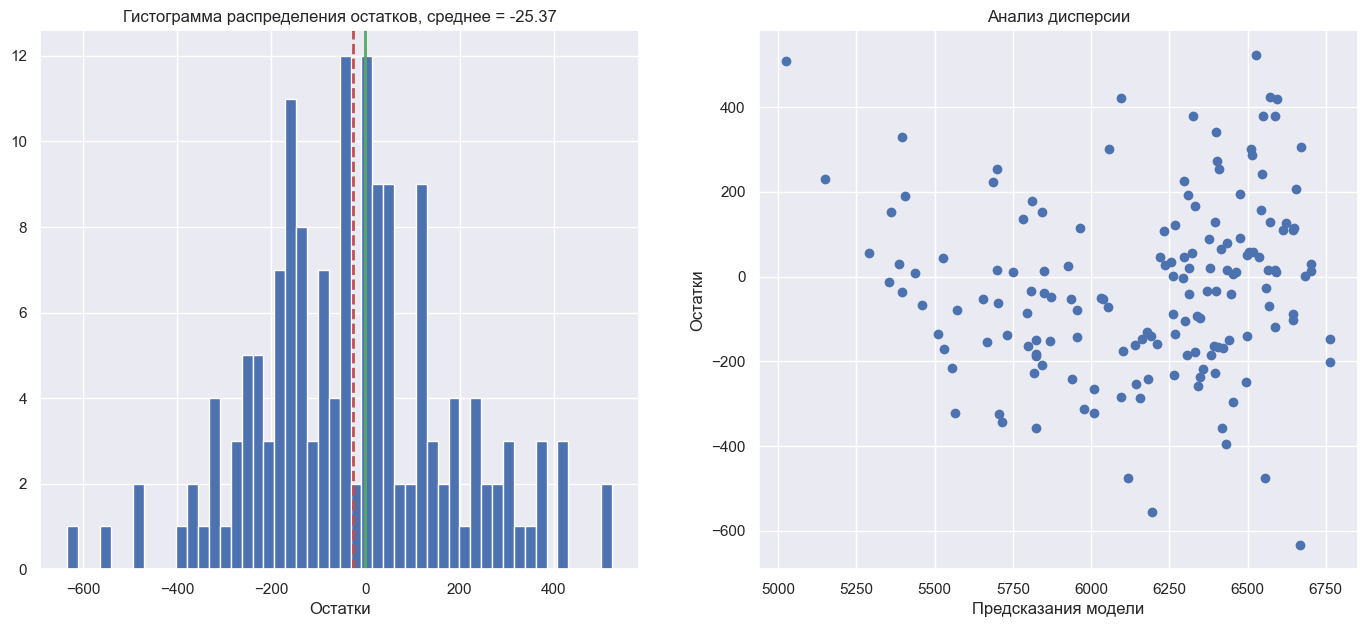

In [39]:
# Проведем анализ остатков
# Перед этим рассчитаем остатки
residuals = y1_test-y1_pred

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
axes[0].hist(residuals, bins=50)
axes[0].axvline(x=residuals.mean(), color='r', linestyle='--', linewidth=2)
axes[0].axvline(x=0, color='g', linestyle='-', linewidth=2)
axes[0].set_title(f'Гистограмма распределения остатков, среднее = {residuals.mean():.2f}')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y1_pred, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Среднее значение на гистограмме смещено влево от нуля и равно −25.37 - значит модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

На диаграмме рассеяния мы наблюдаем на одном участке разброс значений остатков больше, чем на другом, значит модель неравномерно ошибается.

**Вывод:** коэффициент детерминации показал, что модель в 78% случаях предсказывает ближе, чем среднее. Это неплохой результат.

Исследование остатков показало, что модель часто дает большие предсказания, ее прогнозы больше истинных значений. Для фермера такая ситуация невыгодна: купит корову с хорошим предсказанным удоем, который окажется на самом деле меньше.

Тем более дисперсия неравномерная, что говорит о непостоянстве модели.

#### **Вторая модель**

Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель.

Исключим нелинейность, чтобы признаки были информативны для линейной регрессии. 

In [40]:
# Преобразуем СПО в категориальный бинарный признак
def categorize_spo(spo):
    if spo<=0.9:
        return 'меньше 0.9'
    return 'больше 0.9'
# Создаем столбец с категориями СПО
ferma_main['спо_категории'] = ferma_main['спо'].apply(categorize_spo)

In [41]:
# Устраним нелинейность между целевым и входным признаком "эке"
ferma_main['эке_квадрат'] = ferma_main['эке']**2

Теперь создадим вторую модель: подготовим данные, обучим модель, оценим её качество.

In [42]:
# Разметим данные
X = ferma_main[['порода', 'порода_папы_быка', 
                'возраст', 'эке_квадрат', 'сырой_протеин', 
                'спо_категории','тип_пастбища']]
y = ferma_main['удой']

In [43]:
# Разделим данные на выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [44]:
# Обучаем модель на тренировочных данных
model_lr.fit(X2_train,y2_train)
# Получаем предсказания
y2_pred = model_lr.predict(X2_test)

In [45]:
# Рассчитаем коэффициент детерминации
r2 = r2_score(y2_test, y2_pred)
r2

0.8180879926867503

В 82% случаев предсказание модели ближе к истине, чем среднее значение целевого признака. 

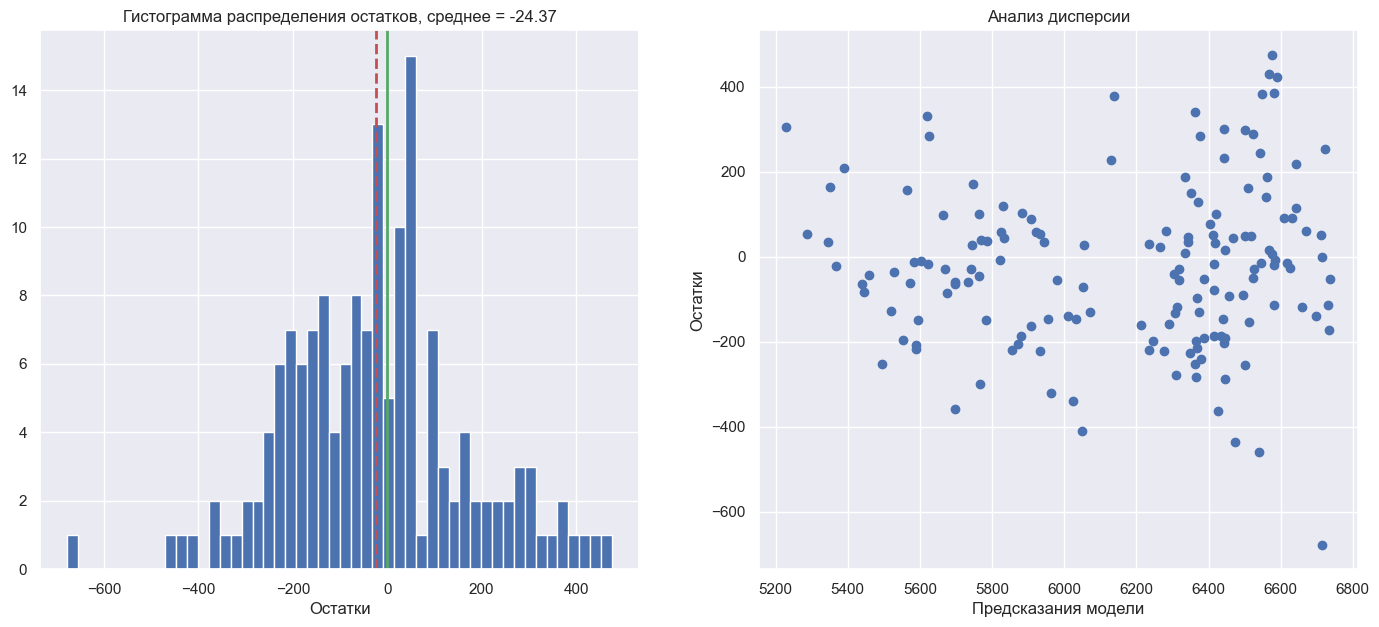

In [46]:
# Проведем анализ остатков
# Перед этим рассчитаем остатки
residuals = y2_test-y2_pred

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
axes[0].hist(residuals, bins=50)
axes[0].axvline(x=residuals.mean(), color='r', linestyle='--', linewidth=2)
axes[0].axvline(x=0, color='g', linestyle='-', linewidth=2)
axes[0].set_title(f'Гистограмма распределения остатков, среднее = {residuals.mean():.2f}')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y2_pred, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Среднее значение на гистограмме смещено влево от нуля и равно −24.37 - значит модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

На диаграмме рассеяния мы наблюдаем чередование низкой и высокой дисперсии остатков, значит модель неравномерно ошибается.

**Вывод:** по сравнению с первой моделью мы улучшили метрику $r^2$ на 4%, при этом среднее остатков уже меньше отклоняется от центра. Модель все еще не постоянная. 

#### **Третья модель**

Добавим в данные новый признак и обучим на них третью модель.

In [47]:
# Добавим признак имя_папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
ferma = ferma_main.merge(ferma_dad, on='id')
# Проверка сохранения данных
print(ferma.shape, ferma_main.shape)

(628, 15) (628, 14)


Теперь создадим третью модель: подготовим данные, обучим модель, оценим её качество.

In [48]:
# Разметим данные
X = ferma[['порода', 'порода_папы_быка', 
                'возраст', 'эке_квадрат', 'сырой_протеин', 
                'спо_категории','тип_пастбища','имя_папы']]
y = ferma['удой']

In [49]:
# Разделим данные на выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [50]:
# Обучаем модель на тренировочных данных
model_lr.fit(X3_train,y3_train)
# Получаем предсказания
y3_pred = model_lr.predict(X3_test)

In [51]:
# Рассчитаем коэффициент детерминации
r2 = r2_score(y3_test, y3_pred)
r2

0.8247542745210406

В 82% случаев предсказание модели ближе к истине, чем среднее значение целевого признака.

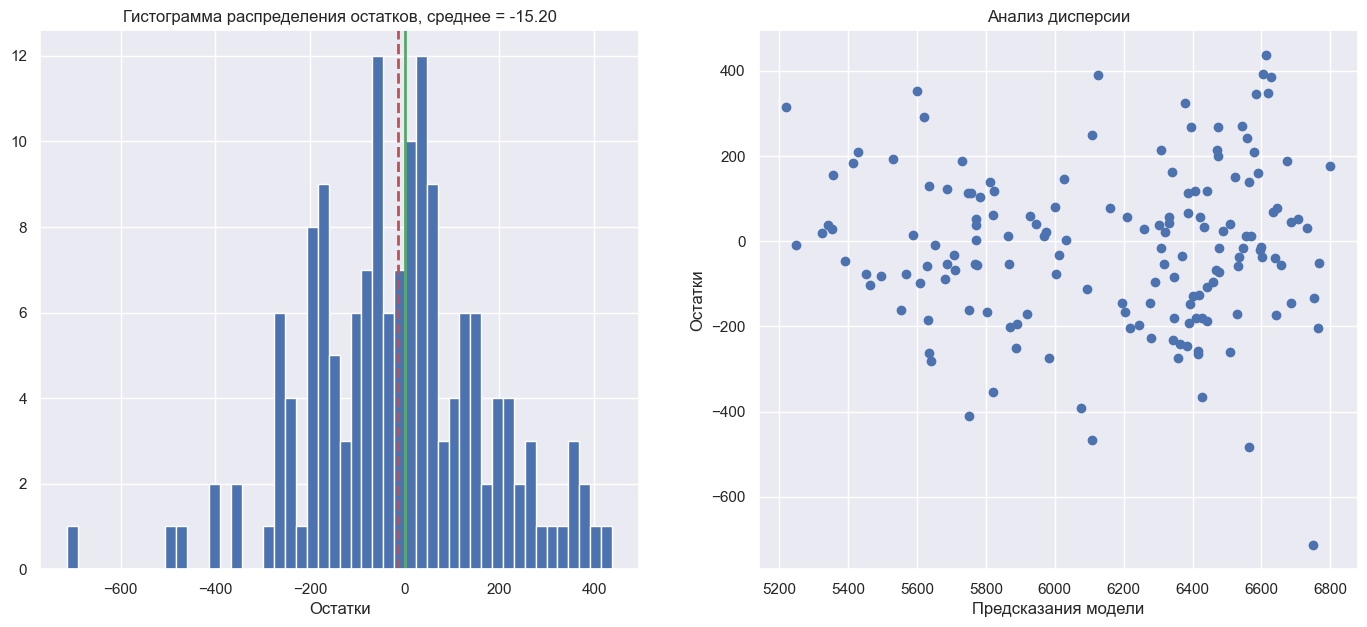

In [52]:
# Проведем анализ остатков
# Перед этим рассчитаем остатки
residuals = y3_test-y3_pred

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
axes[0].hist(residuals, bins=50)
axes[0].axvline(x=residuals.mean(), color='r', linestyle='--', linewidth=2)
axes[0].axvline(x=0, color='g', linestyle='-', linewidth=2)
axes[0].set_title(f'Гистограмма распределения остатков, среднее = {residuals.mean():.2f}')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y3_pred, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Среднее значение на гистограмме смещено влево от нуля и равно −15.20 - значит модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений. 

На диаграмме рассеяния мы наблюдаем более равномерное распределение дисперсии остатков, значит модель стала стабильнее.

**Вывод:** по сравнению со второй моделью мы сохранили ту же метрику $r^2$ = 82%, при этом среднее остатков меньше отклонилось от центра. Качество модели стало лучше, новый признак сделал ее более постоянной. Такая модель пригодна для использования.

**Общий вывод:** самый лучший $r^2$ у третьей и второй модели - 82%. Первая не сильно ушла от этого значения: 78%. 

Самое худшее смещение среднего остатков у 1 модели - 25.37, что говорит о ее больших предсказаний. Наименьшие в среднем остатки у третьей модели - 15.20.

Таким образом, третья модель показала лучшее качество.

#### Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [55]:
# Опишем функцию для вычисления метрик
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return f'mse = {mse}, rmse = {rmse}, mae = {mae}'

In [56]:
display(metrics(y1_test, y1_pred), metrics(y2_test, y2_pred), metrics(y3_test, y3_pred))

'mse = 43887.01500966049, rmse = 209.49227911706075, mae = 164.24194463474916'

'mse = 37030.91131113694, rmse = 192.4341739690145, mae = 149.03965222364604'

'mse = 35673.88988618196, rmse = 188.87532895055924, mae = 146.16302445362325'

Самая качественная модель с учетом оценок - третья. У нее наименьше значение MSE, MAE, RMSE. 

Укажем доверительный интервал прогноза лучшей модели.

In [57]:
# Получаем предсказания модели на обучающем наборе.
y_train_pred = model_lr.predict(X3_train)
# Вычисляем остатки
errors = y3_train - y_train_pred
# Определяем границы доверительного интервала
alpha = 0.95 
lower_quantile = (1 - alpha) / 2
upper_quantile = 1 - lower_quantile

# Считаем квантили
lower_bound = errors.quantile(lower_quantile)
upper_bound = errors.quantile(upper_quantile)

print(f"Доверительный интервал прогноза лучшей модели: [{lower_bound:.2f}, {upper_bound:.2f}]")

Доверительный интервал прогноза лучшей модели: [-355.99, 363.24]


#### Спрогнозируем удой коров, которых фермер хочет купить

Добавим недостающие признаки:

In [58]:
cow_buy['эке_квадрат'] = ferma['эке_квадрат'].mean() * 1.05
cow_buy['эке'] = ferma['эке'].mean() * 1.05
cow_buy['сырой_протеин'] = ferma['сырой_протеин'].mean() * 1.05
cow_buy['спо'] = ferma['спо'].mean() * 1.05
cow_buy['спо_категории'] = cow_buy['спо'].apply(categorize_spo)

Выполним подготовку данных.

In [59]:
# Разметим данные
X = cow_buy[['порода', 'порода_папы_быка', 
                'возраст', 'эке_квадрат', 'сырой_протеин', 
                'спо_категории','тип_пастбища','имя_папы']]

In [60]:
# Получаем предсказания
udoy_pred = model_lr.predict(X)

In [61]:
# Посмотрим на полученные предсказания
udoy_pred

array([6569.54294317, 6338.33467472, 6243.62342168, 6552.71302289,
       6501.76971268, 6385.00386394, 6569.54294317, 6530.88338347,
       6243.62342168, 6360.16431414, 6304.33150611, 6577.5525727 ,
       6569.54294317, 6087.09838866, 6243.62342168, 6552.71302289,
       6304.33150611, 6385.00386394, 6530.88338347, 6501.76971268])

**Вывод:** таким образом, с помощью лучшей модели мы спрогнозировали удой коров, которых фермер хочет купить. Среди них достаточно много коров, которые удовлетворяют требованиям фермера по удою.

### Обучение модели логистической регрессии
<a id='logistic'></a>

Подготовим данные датасета и обучим на них модель.

В качестве целевого признака используем `вкус_молока`.

In [62]:
# Кодируем целевой признак
le = LabelEncoder()
target = le.fit_transform(ferma['вкус_молока'])
# Разметим данные
X = ferma[['порода', 'порода_папы_быка', 
                'возраст', 'эке', 'сырой_протеин', 
                'спо','тип_пастбища', 
                'белок','жирность','имя_папы']]
y = 1 - target

Разобьем данные на тренировочную и тестовую выборки.

In [63]:
# Разделим данные на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

Обучим модель логистической регрессии на подготовленных данных.

In [64]:
# Обучаем модель на тренировочных данных
clf.fit(X_train,y_train)
# Получаем предсказания
y_clf_pred = clf.predict(X_test)

Оценим качество модели на тестовой выборке.

In [65]:
# Рассчитаем метрики
accuracy = accuracy_score(y_test, y_clf_pred)
precision = precision_score(y_test, y_clf_pred)
recall = recall_score(y_test, y_clf_pred)
print(f'Accuracy = {accuracy}, precision = {precision}, recall = {recall}')

Accuracy = 0.6178343949044586, precision = 0.6147540983606558, recall = 0.8522727272727273


**Вывод:** Модель в 62% случаях предсказывает правильные ответы, в 61% случаях точно предсказывает вкусное молоко, 85% реальных положительных случаев модель смогла правильно идентифицировать. 

Построим матрицу ошибок.

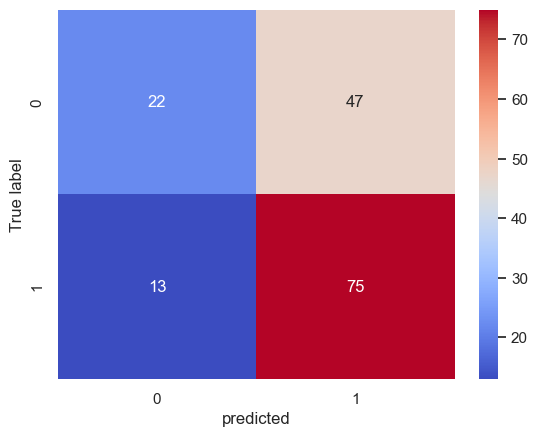

In [66]:
# Считаем матрицу
cm = confusion_matrix(y_test, y_clf_pred)
# Визуализируем через тепловую карту
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('predicted');

**Вывод:** 47 ложно-положительных предсказаний и 13 ложно-отрицательных.

**Проанализируем модель логистической регрессии:** ошибка первого рода критичнее всего при покупке коров, потому что главное для заказчика — вкусное молоко. Ему выгоднее купить коров, у которых точно будет вкусное молоко, нежели чем как можно больше коров с возможно вкусным молоком. Значит для нашей модели наиболее важная метрика - precision.

Настроим порог классификации для сведения критичной ошибки к нулю.

In [67]:
# Определим предсказание вероятностей
y_proba = clf.predict_proba(X_test)[:,1]

# Запишем список с порогами
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]

# Создадим датафрейм с предсказаниями 
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# Добавим столбцы с новыми предсказаниями

results = [] 

for i in thresholds:
    y_pred = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    prec = precision_score(data['y_valid'], y_pred, zero_division=0)
    results.append({'Порог': f'y_pred_{i}', 'Precision': prec,
                    'Количество "правильных единичек"': ((y_pred == 1) & (data['y_valid'] == 1)).sum(), 
                    'Количество False Positive': ((y_pred == 1) & (data['y_valid'] == 0)).sum(),
                    'Количество False Negative': ((y_pred == 0) & (data['y_valid'] == 1)).sum()})
    data[f'y_pred_{i}'] = y_pred
# Оформляем в датафрейм
result = pd.DataFrame(results)
result.head(10)

Порог  Precision  Количество "правильных единичек"  \
0   y_pred_0.1   0.560510                                88   
1  y_pred_0.19   0.560510                                88   
2  y_pred_0.28   0.567742                                88   
3  y_pred_0.37   0.577181                                86   
4  y_pred_0.46   0.609023                                81   
5  y_pred_0.55   0.635514                                68   
6  y_pred_0.64   0.684932                                50   
7  y_pred_0.73   0.769231                                30   
8  y_pred_0.82   1.000000                                 2   
9  y_pred_0.91   0.000000                                 0   

   Количество False Positive  Количество False Negative  
0                         69                          0  
1                         69                          0  
2                         67                          0  
3                         63                          2  
4                         52                          7  
5                         39                         20  
6                         23                         38  
7                          9                         58  
8                          0                         86  
9                          0                         88

**Вывод:** Самое оптимальное значение порога — 0.82. При дальнейшем предсказании ответов будет учитывать этот порог.

#### Спрогнозируем вкус молока коров, которых фермер хочет купить

In [68]:
# Разметим данные
X_cow = cow_buy[['порода', 'порода_папы_быка', 
                'возраст', 'эке', 'сырой_протеин', 
                'спо','тип_пастбища', 
                'белок','жирность','имя_папы']]

In [69]:
# Получаем вероятности 
taste_proba = clf.predict_proba(X_cow)[:,1]

In [70]:
# Получаем предсказания с учетом порога
taste_pred = np.array([1 if i >= 0.82 else 0 for i in taste_proba])
taste_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Вывод:** таким образом, мы получили прогноз вкуса молока коров.

### Итоговые выводы
<a id='final'></a>

Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

In [71]:
cow_buy['удой'] = udoy_pred
cow_buy['вкус_молока'] = taste_pred

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [72]:
cow_buy[(cow_buy['удой'] >= 6000) & (cow_buy['вкус_молока'] == 1)]

Empty DataFrame
Columns: [порода, тип_пастбища, порода_папы_быка, имя_папы, жирность, белок, возраст, эке_квадрат, эке, сырой_протеин, спо, спо_категории, удой, вкус_молока]
Index: []

**Вывод:** Фермер не может купить корову с минимальным риском для себя. Она неточно будет давать вкусное молоко и удой более 6000 кг в год. 

Таким образом мы создали модель машинного обучения для владельца молочного хозяйства «Вольный луг» и выполнили следующие цели:

1. Выполнили предобработку,исследовательский и корреляционний анализ данных.
2. Создали модель, которая будет прогнозировать возможный удой коровы (целевой признак `Удой`).
3. Создали модель, которая будет рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

Для этого были выполнены следующие действия:

- **Открыты файлы** с данными и изучена общая информация: 

**`ferma_main.csv`** содержит **634 строк и 12 столбцов**.

**`ferma_dad.csv`** содержит **629 строк и 2 столбца**.

**`cow_buy.csv`** содержит **20 строк и 7 столбцов**.

В данных присутствовали неправильные названия столбцов, пропуски отсутствовали, типы данных корректны.


- Выполнена **предобработка данных:**
    
    переименовали названия столбцов в нижний регистр;
    
    проверили данные на пропущенные значения и не обнаружили;
    
    изучили неявные и явные дубликаты и устранили.


- Провели **исследовательский анализ данных:**

  избавились от аномальных значений и посмотрели на распределение количественных признаков;
  
  проанализировали категориальные признаки.
  

- Построили прогнозную модель регрессии:

    использовали следующие **улучшения**: исключили нелинейность и добавили новый признак - метрики модели действительно стали лучше;
    
    результаты модели можно еще улучшить, если добавить новые признаки или количество данных.
    

- Построили прогнозную модель классификации:

    использовали метрику precision в данном случае, потому что важно было отобрать точно верные случаи и исключить ложные;
    
    при анализе рисков и экономических расчетов важно понимать цели, которые мы преследуем, и уже основываясь на этом, определить, обращать ли внимание на accuracy, precision или recall.
    
**Рекомендации для бизнеса:** купить корову породы РефлешнСоверинг с минимальным риском для себя: она точно будет давать вкусное молоко и удой более 6000 кг в год. 
  

